In [1]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [2]:

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'  
torch.cuda.empty_cache()

In [3]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [4]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    plot_euclidean_distance_over_time,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    test_model_in_all_trajectories_with_different_single_observation_in_df,
    )

In [5]:
save_dir_path = "./save_directory_noisy_full_pred_low_samples_pendulum_3" 


In [6]:
with open("all_dataframes_low_samples_pendulum.pkl", "rb") as f:
    loaded_dfs_low_samples_pendulum = pickle.load(f)

# Access them like before:
train_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['train_df_low_samples_pendulum']
val_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['val_df_low_samples_pendulum']
test_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['test_df_low_samples_pendulum']

train_id_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['train_id_df_low_samples_pendulum']
val_id_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['val_id_df_low_samples_pendulum']
test_id_df_low_samples_pendulum = loaded_dfs_low_samples_pendulum['test_id_df_low_samples_pendulum']

with open("df_high_energy_low_samples_pendulum.pkl", "rb") as f:
    df_high_energy_low_samples_pendulum = pickle.load(f)

val_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['val_df_high_energy_low_samples_pendulum']
val_id_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['val_id_df_high_energy_low_samples_pendulum']

test_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['test_df_high_energy_low_samples_pendulum']
test_id_df_high_energy_low_samples_pendulum = df_high_energy_low_samples_pendulum['test_id_df_high_energy_low_samples_pendulum']

with open("all_dataframes_low_samples_multiple_periods_pendulum.pkl", "rb") as f:
    df_low_samples_multiple_periods_pendulum = pickle.load(f)

test_df_low_samples_multiple_periods_pendulum = df_low_samples_multiple_periods_pendulum['data_df_low_samples_multiple_periods_pendulum']
test_id_df_low_samples_multiple_periods_pendulum = df_low_samples_multiple_periods_pendulum['id_df_low_samples_multiple_periods_pendulum']




📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 592 with the value: 0.0531, the losses of the last 5 epochs are: ['0.0587', '0.0584', '0.0579', '0.0556', '0.0596']
  Lowest loss of metric 'val_variance_loss_high_energy' recorded in epoch 453 with the value: 0.1513, the losses of the last 5 epochs are: ['0.2103', '0.2136', '0.2091', '0.1905', '0.1986']
  Lowest loss of metric 'val_prediction_loss_high_energy' recorded in epoch 530 with the value: 0.4057, the losses of the last 5 epochs are: ['0.4818', '0.4871', '0.4828', '0.4570', '0.4633']
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 592 with the value: 0.0019, the losses of the last 5 epochs are: ['0.0023', '0.0026', '0.0027', '0.0025', '0.0024']
  Lowest loss of metric 'val_prediction_loss_training_set' recorded in epoch 592 with the value: 0.0473, the losses of the last 5 epochs are: ['0.0489', '0.0541', '0.0535', '0.0539', '0.0532']
  Lowest loss of metric 'val_var

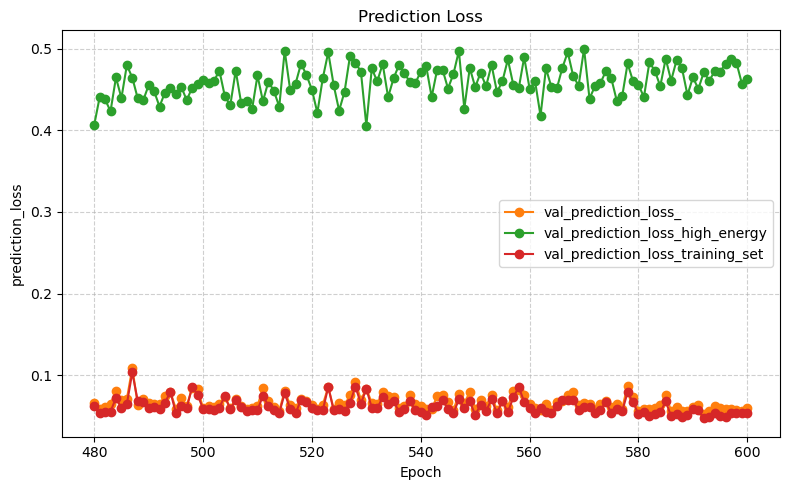

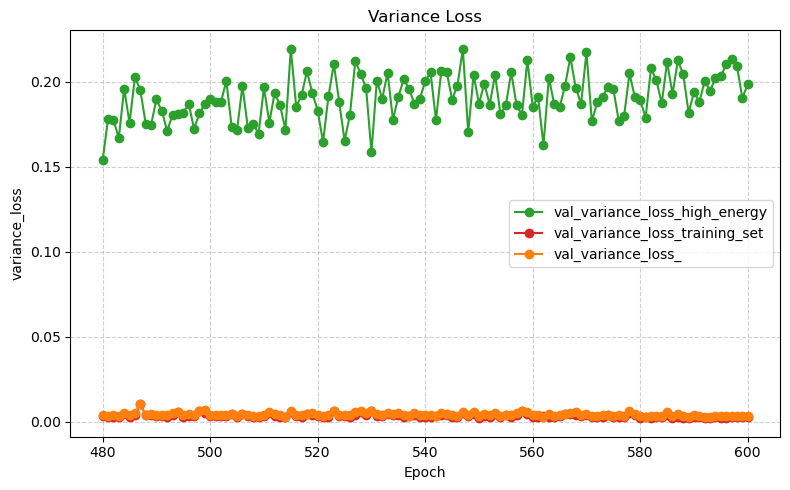

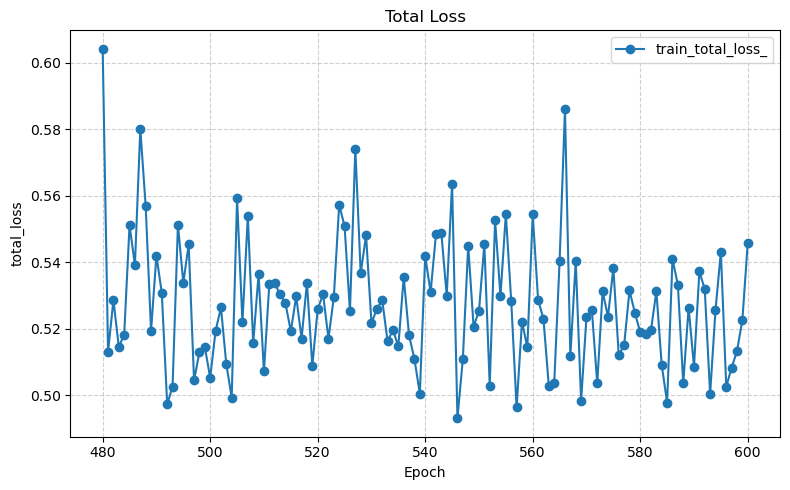

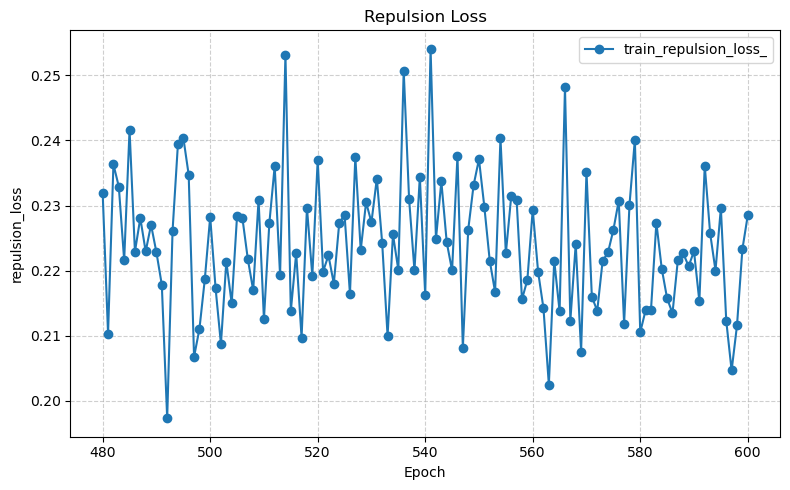

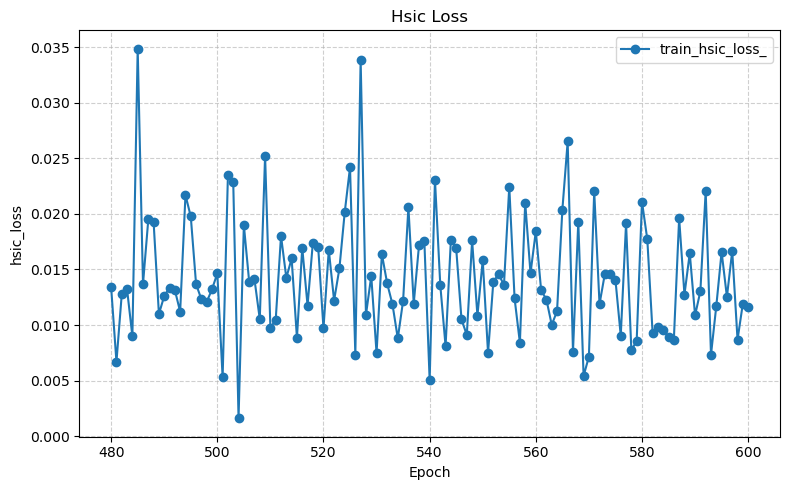

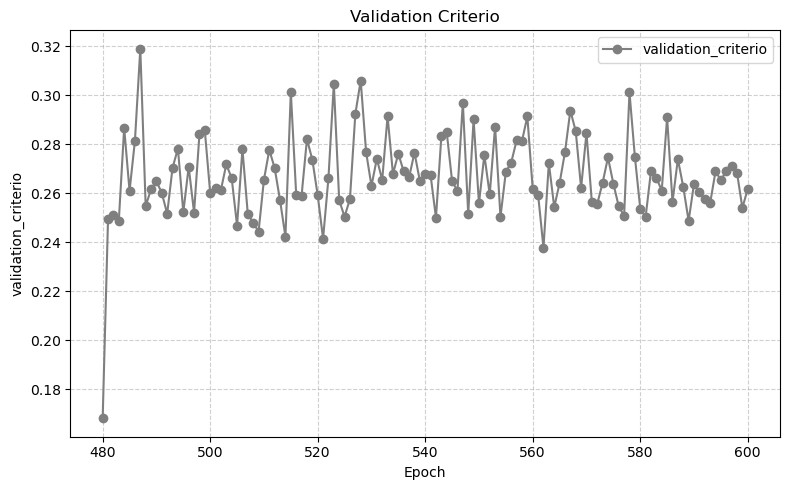

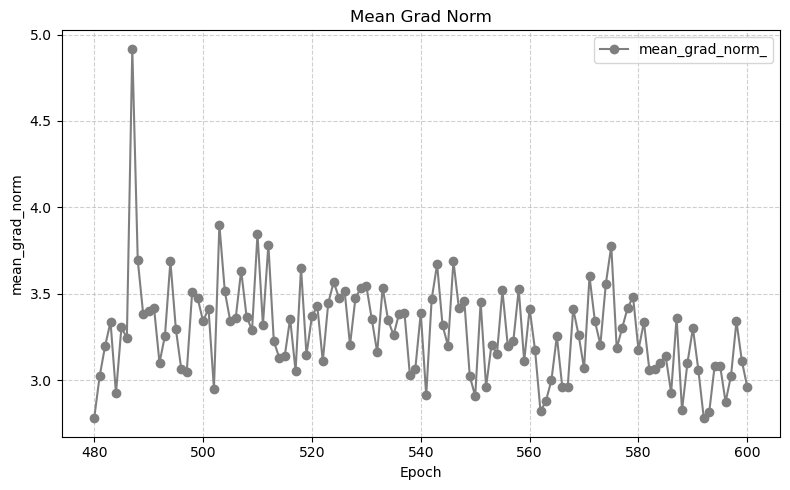

In [223]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "val_variance_loss_high_energy"
, "val_prediction_loss_high_energy", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=[480, "last"]
)




📊 Processing directory: val_trajectories_data

For the epoch_738 in val_trajectories_data the values are:
5: X_mean = 0.8274 ± 0.0769, U_mean = 0.7599 ± 0.0845 and energy=1.3666666666666667, phi0=0.7112530348369385
53: X_mean = 1.7731 ± 0.0570, U_mean = -1.9977 ± 0.0722 and energy=2.006666666666667, phi0=-2.4981901653384453
31: X_mean = 0.2768 ± 0.0647, U_mean = 0.2960 ± 0.0723 and energy=1.7133333333333338, phi0=0.2441816641299383

📊 Processing directory: val_train_set_trajectories_data

For the epoch_738 in val_train_set_trajectories_data the values are:
61: X_mean = 0.2667 ± 0.0422, U_mean = 0.5972 ± 0.0322 and energy=2.1133333333333333, phi0=0.5187756048832214
54: X_mean = 1.4465 ± 0.0663, U_mean = -2.1620 ± 0.0612 and energy=2.02, phi0=-2.234453591452867
16: X_mean = 0.2997 ± 0.0380, U_mean = -1.3620 ± 0.0682 and energy=1.5133333333333334, phi0=-1.1130378924250106

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_738 in val_high_energy_trajectories_data th

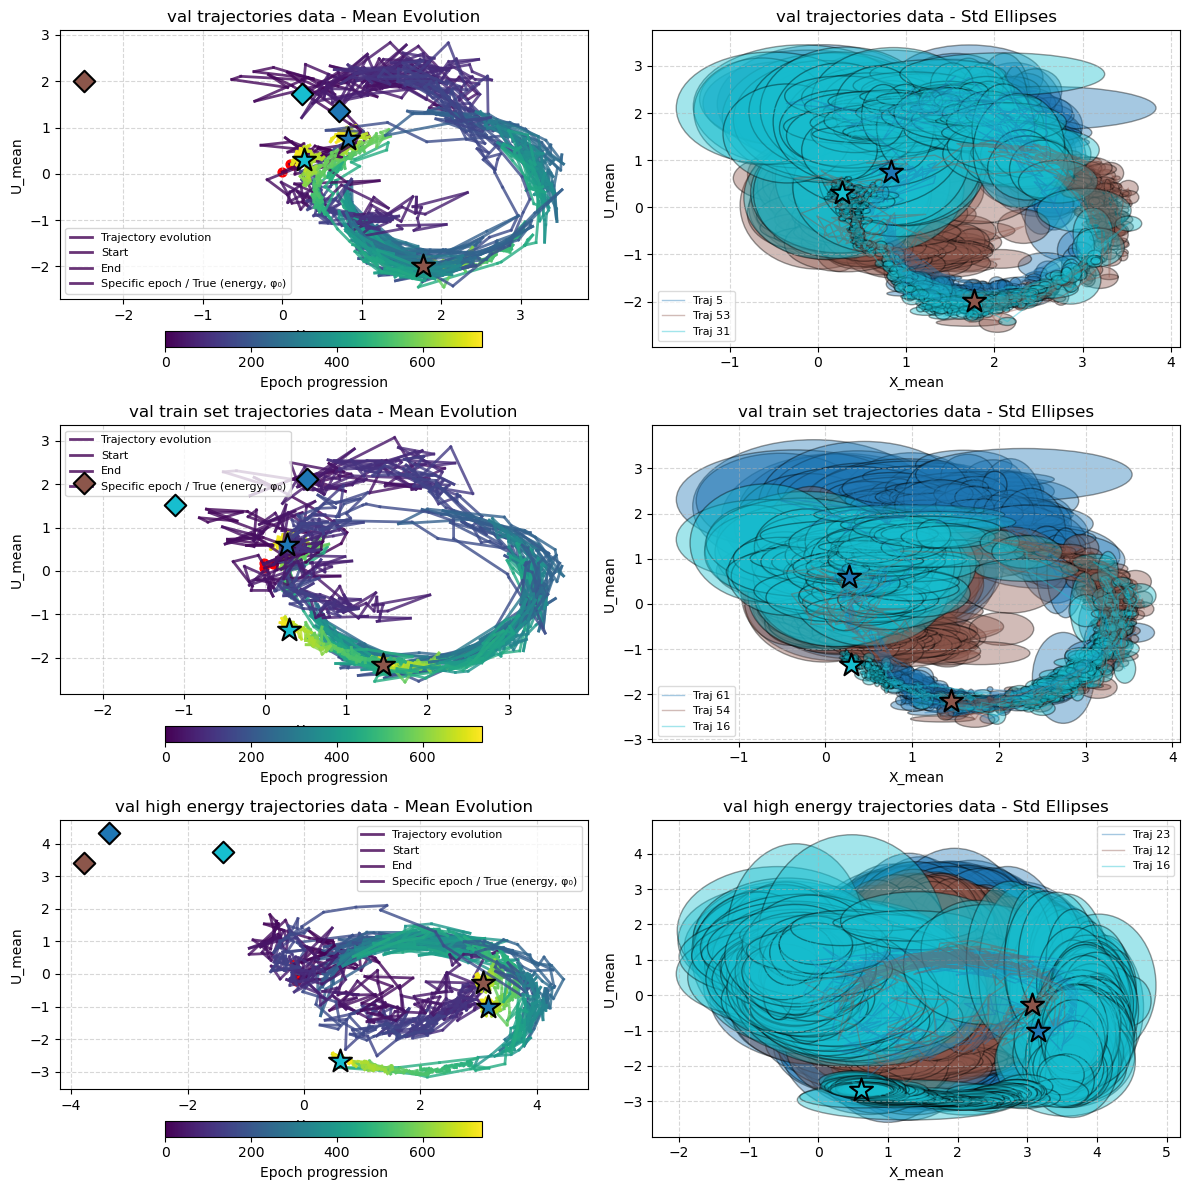


✅ Mean + Std (ellipse) visualization complete.


In [112]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_low_samples_pendulum,val_id_df_added=val_id_df_low_samples_pendulum,val_id_df_high_energy_added=val_id_df_high_energy_low_samples_pendulum, pendulum=True)

In [207]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_low_samples_pendulum,
    val_id_df_added=val_id_df_low_samples_pendulum,
    val_id_df_high_energy_added=val_id_df_high_energy_low_samples_pendulum,
    pendulum=True
)

📂 Using data from epoch: epoch_621
✅ Data extraction complete.


In [208]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['energy']),
    y=torch.Tensor(val_train_differencies_set_df['phi0']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [209]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0051)

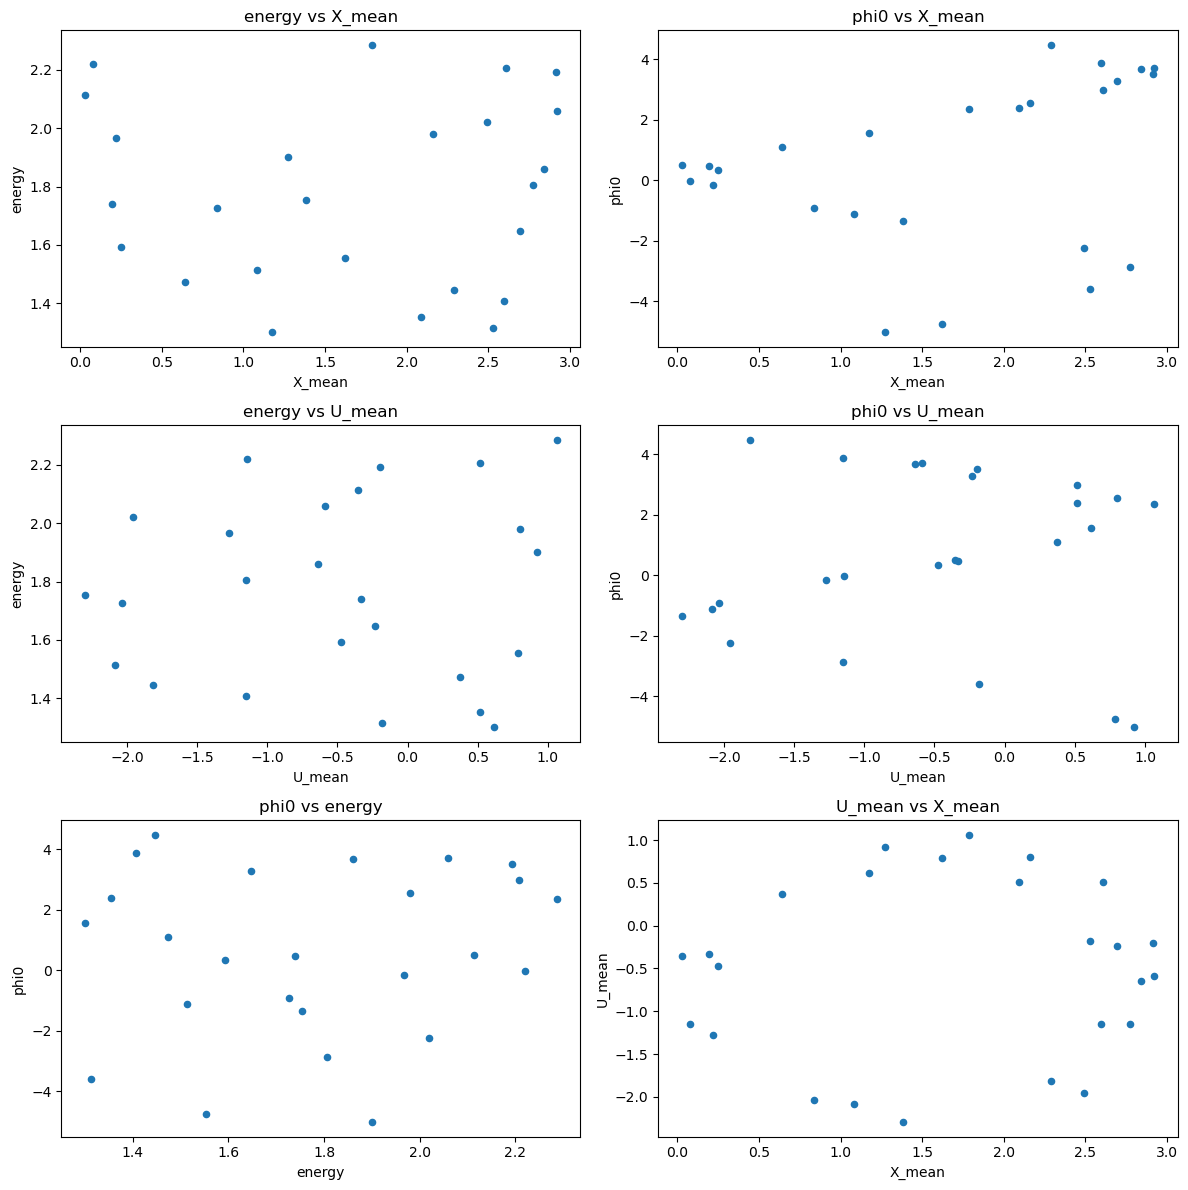

In [210]:
plot_differencies(val_train_differencies_set_df, pendulum=True)

📊 Analyzing 708 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


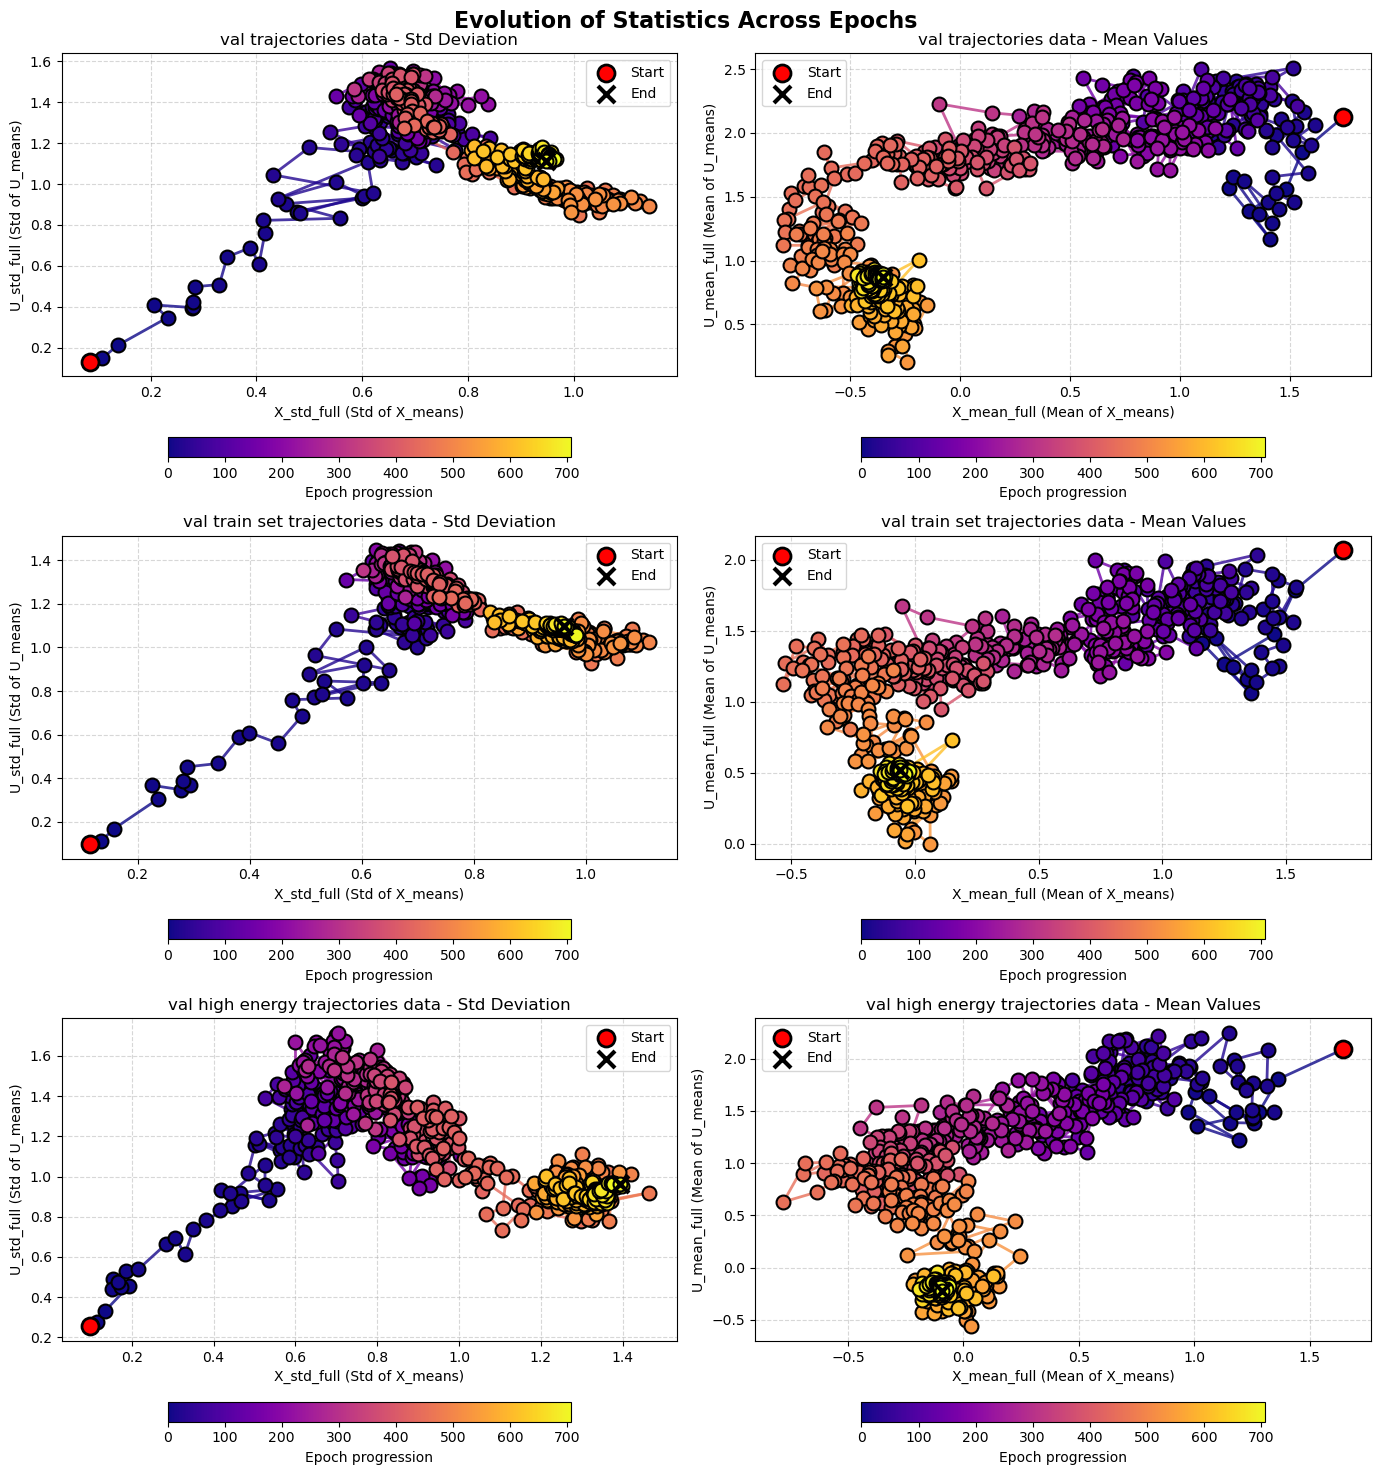

In [107]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [7]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [33, 60, 32],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [225]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, trajectory_id=20, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
✓ All 30 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 5.36e-07
For the inverse network:
✓ All 30 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 3.58e-07


In [226]:
print(f"Number of parameters are: {count_parameters(mapping_net)}, with number of training samples: {train_df_low_samples_pendulum.shape[0]}\nThat is a ratio of parameters/samples of: {count_parameters(mapping_net)/train_df_low_samples_pendulum.shape[0]}")

Number of parameters are: 82560, with number of training samples: 750
That is a ratio of parameters/samples of: 110.08


   num_observed_points  mean_loss
0                    1   0.055836
1                    2   0.054704
2                    3   0.054358
3                    4   0.055789
4                    5   0.055101
5                    6   0.053949
6                    7   0.052154
7                    8   0.051576
8                    9   0.044093
9                   10   0.038831


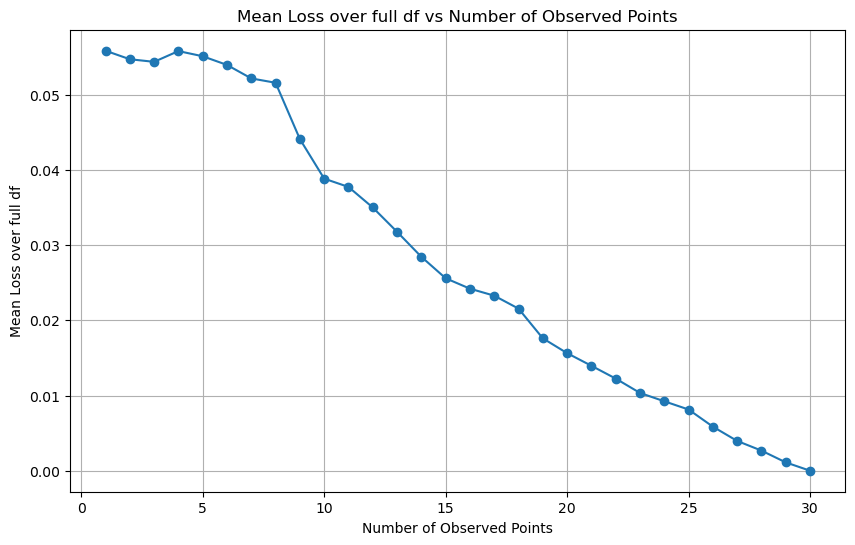

In [227]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       0.002637
2                    3       0.002376
3                    4       0.001827
4                    5       0.001771
5                    6       0.001786
6                    7       0.003341
7                    8       0.002975
8                    9       0.003011
9                   10       0.003118


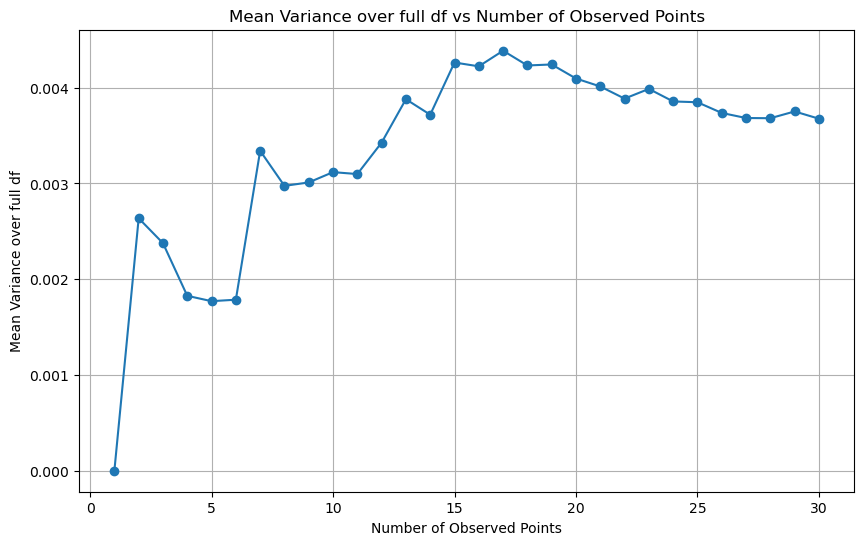

In [228]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net ,device=device)

In [8]:
point_indexes_observed = [0]

In [9]:
tmax_list = []
for idx, row in train_id_df_low_samples_pendulum.iterrows():

    trajectory_id = int(row['trajectory_id'])
    start_index = int(row['start_index'])
    end_index = int(row['end_index'])
    
    test_trajectory_data = get_data_from_trajectory_id(train_id_df_low_samples_pendulum, train_df_low_samples_pendulum, trajectory_ids=trajectory_id)
    t = test_trajectory_data['t'].to_numpy(dtype=np.float32)
    tmax = max(t)
    tmax_list.append(tmax)
max_t_training = min(np.array(tmax_list))

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
3               3  1.340000         0.097233              0.083997
5               5  1.366667         0.080267              0.068661
7               7  1.393333         0.087217              0.073888
10             10  1.433333         0.080310              0.067080
14             14  1.486667         0.099487              0.081594
18             18  1.540000         0.086174              0.069441
20             20  1.566667         0.111257              0.088887
21             21  1.580000         0.096348              0.076651
23             23  1.606667         0.082642              0.065198
27             27  1.660000         0.043127              0.033473
31             31  1.713333         0.118475              0.090512
35             35  1.766667         0.067932              0.051109
37             37  1.793333         0.087974              0.065694
44             44  1.886667         0.096435              0.07

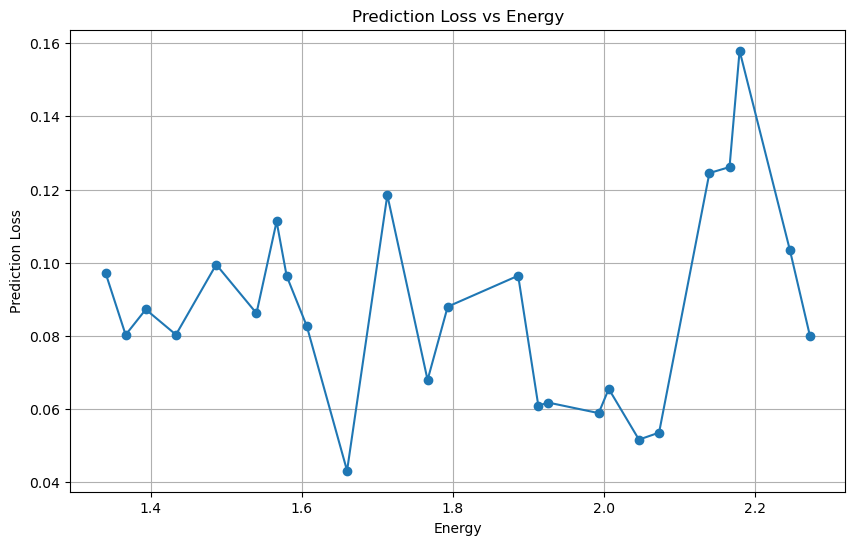

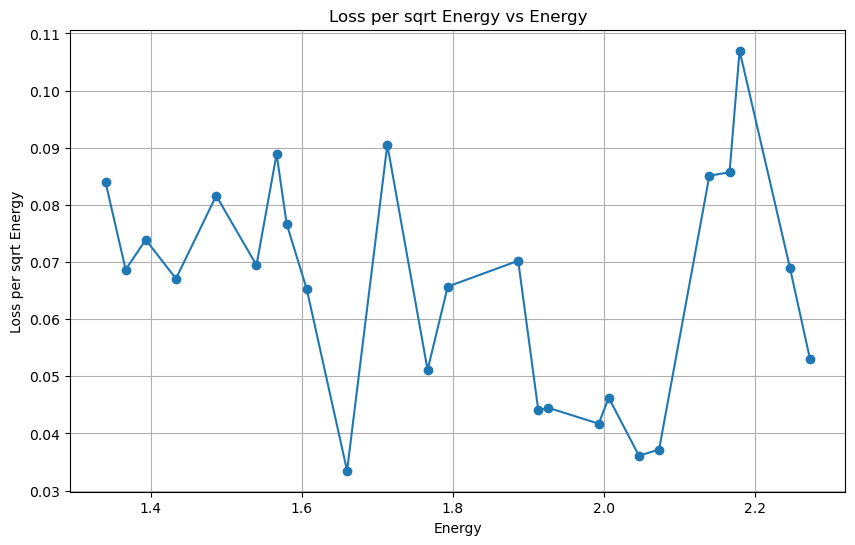

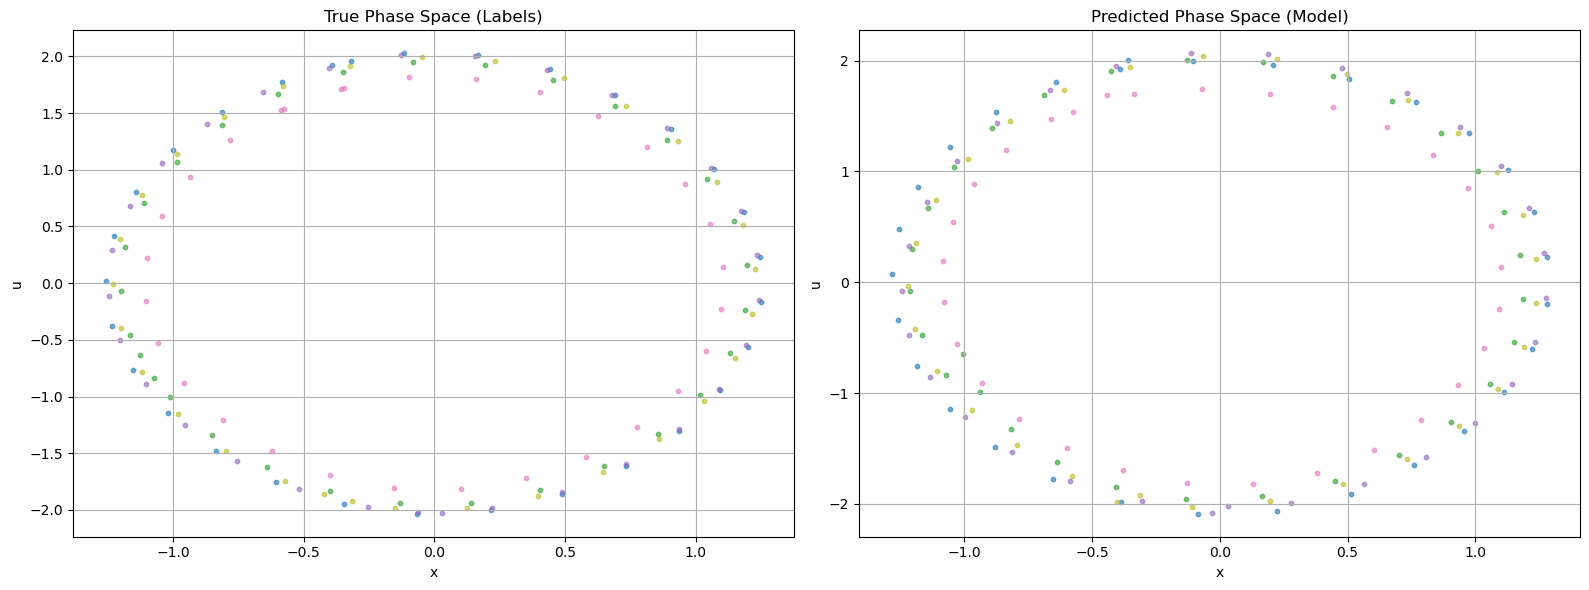

In [ ]:
prediction_val_df, mean_prediction_loss_val, pred_val_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2, max_t_training=max_t_training)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
3               3  1.340000            0.0                       0.0
5               5  1.366667            0.0                       0.0
7               7  1.393333            0.0                       0.0
10             10  1.433333            0.0                       0.0
14             14  1.486667            0.0                       0.0
18             18  1.540000            0.0                       0.0
20             20  1.566667            0.0                       0.0
21             21  1.580000            0.0                       0.0
23             23  1.606667            0.0                       0.0
27             27  1.660000            0.0                       0.0
31             31  1.713333            0.0                       0.0
35             35  1.766667            0.0                       0.0
37             37  1.793333            0.0                       0.0
44             44  1.886667       

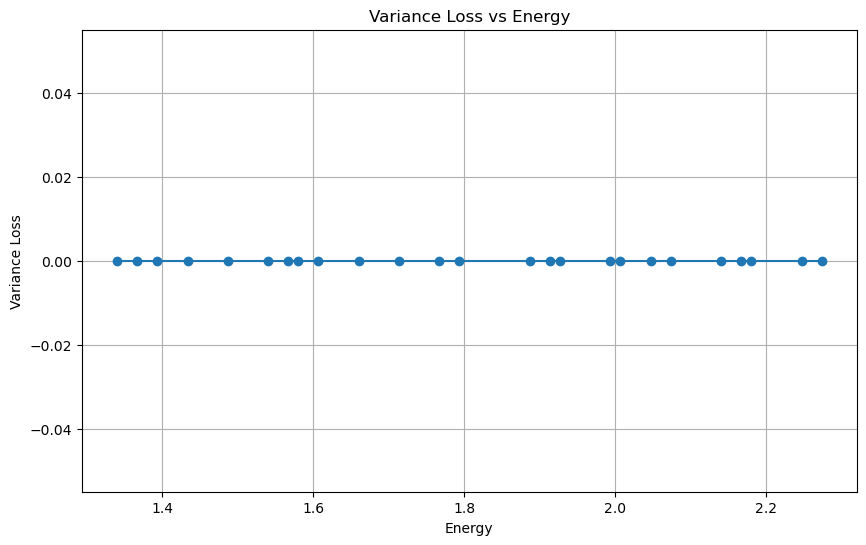

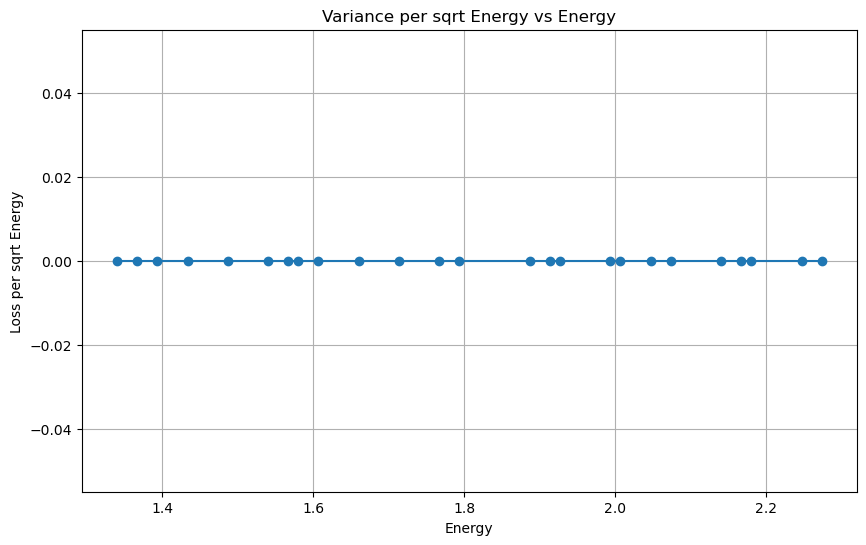

In [231]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [245]:
trajectory_id_to_show_val=56
period_val = val_id_df_low_samples_pendulum[val_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_val]['period'].values[0] if val_id_df_low_samples_pendulum[val_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_val]['motion_type'].values[0] == "oscillating" else 0.0

Observed time points: [0.  1.4]


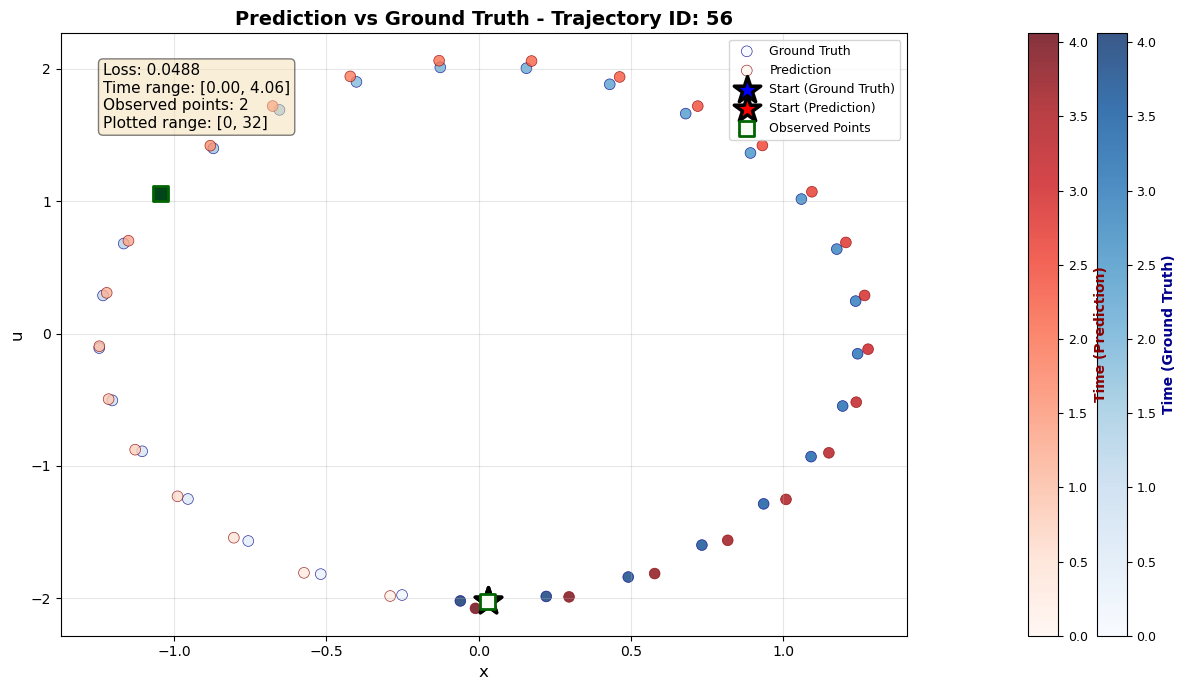

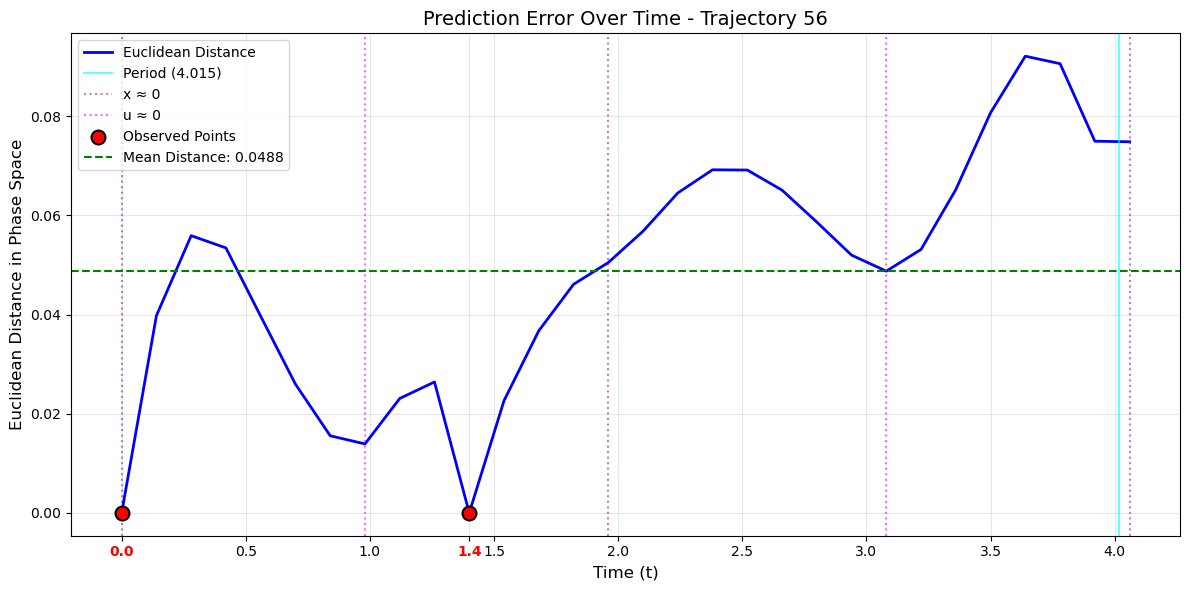

In [ ]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df_low_samples_pendulum, test_df=val_df_low_samples_pendulum, trajectory_id=trajectory_id_to_show_val, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period_val, max_t_training=max_t_training)

    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
2               2  1.326667         0.131035              0.113764
6               6  1.380000         0.157210              0.133826
9               9  1.420000         0.072696              0.061005
12             12  1.460000         0.122933              0.101740
15             15  1.500000         0.091404              0.074631
17             17  1.526667         0.087320              0.070671
24             24  1.620000         0.096927              0.076153
25             25  1.633333         0.082336              0.064425
28             28  1.673333         0.124120              0.095951
29             29  1.686667         0.101465              0.078127
30             30  1.700000         0.060274              0.046228
36             36  1.780000         0.067002              0.050220
39             39  1.820000         0.062441              0.046284
40             40  1.833333         0.074316              0.05

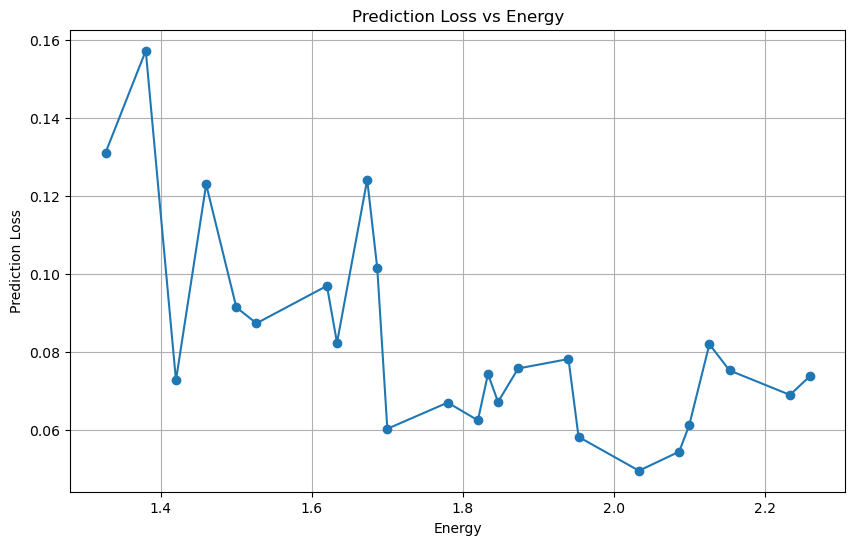

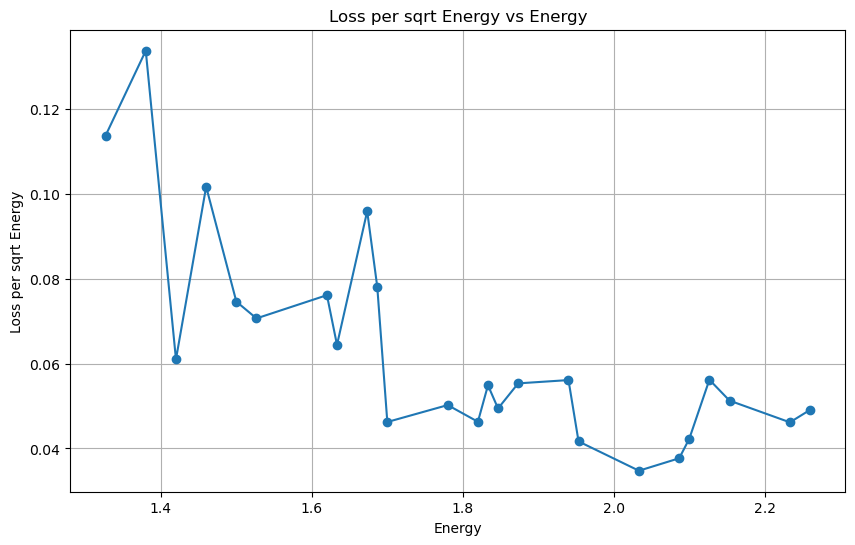

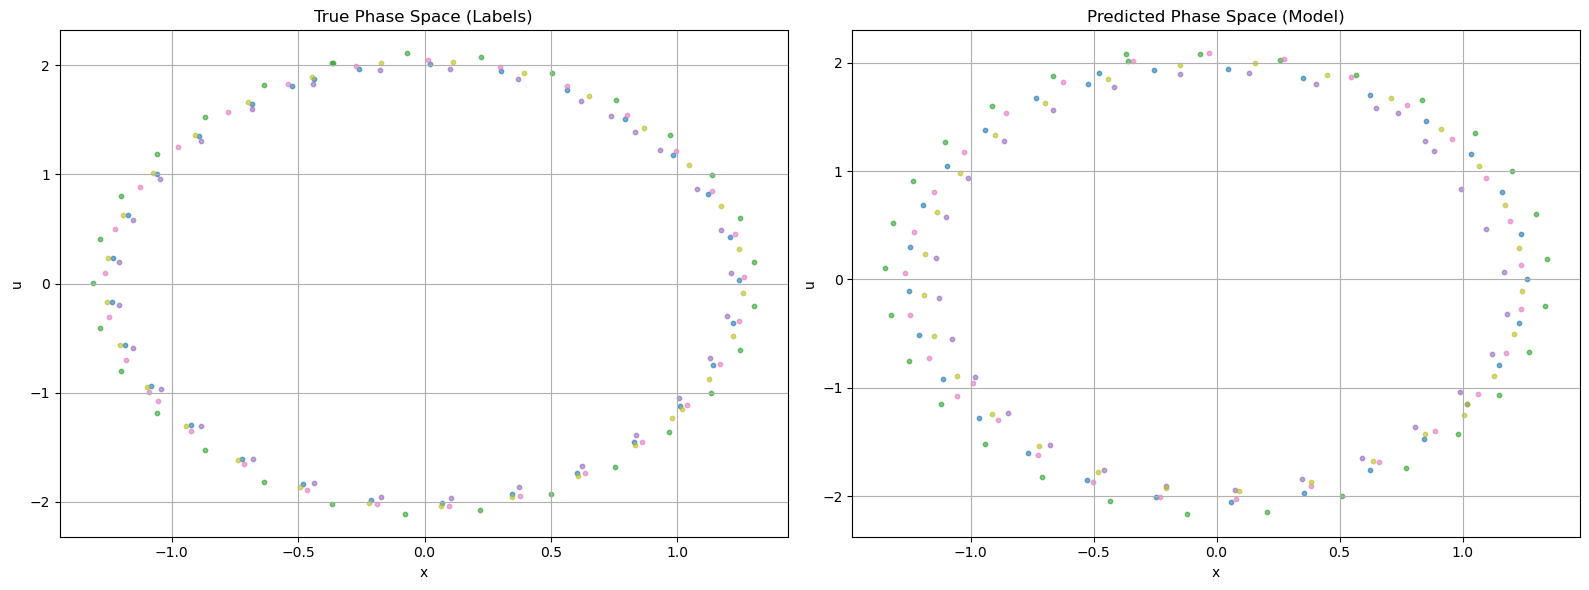

In [ ]:
prediction_test_df, mean_prediction_loss_test, pred_test_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples_pendulum, test_df=test_df_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.2, max_t_training=max_t_training)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
2               2  1.326667            0.0                       0.0
6               6  1.380000            0.0                       0.0
9               9  1.420000            0.0                       0.0
12             12  1.460000            0.0                       0.0
15             15  1.500000            0.0                       0.0
17             17  1.526667            0.0                       0.0
24             24  1.620000            0.0                       0.0
25             25  1.633333            0.0                       0.0
28             28  1.673333            0.0                       0.0
29             29  1.686667            0.0                       0.0
30             30  1.700000            0.0                       0.0
36             36  1.780000            0.0                       0.0
39             39  1.820000            0.0                       0.0
40             40  1.833333       

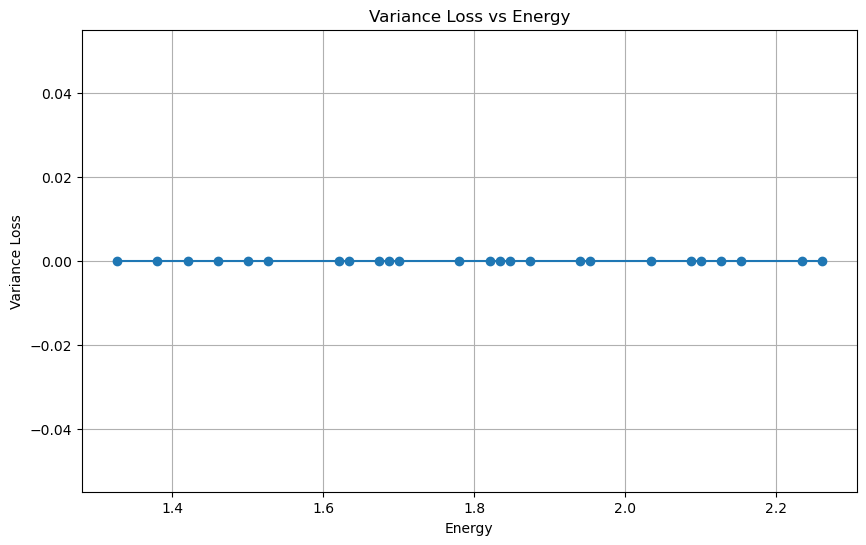

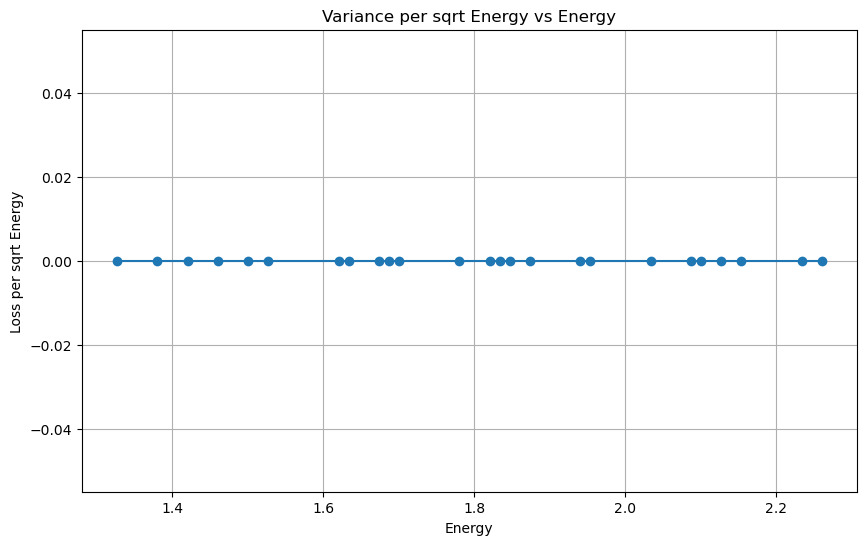

In [76]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_low_samples_pendulum, test_df=test_df_low_samples_pendulum, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


In [235]:
trajectory_id_to_show_test=55
period_test = test_id_df_low_samples_pendulum[test_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test]['period'].values[0] if test_id_df_low_samples_pendulum[test_id_df_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test]['motion_type'].values[0] == "oscillating" else 0.0

Observed time points: [0.]


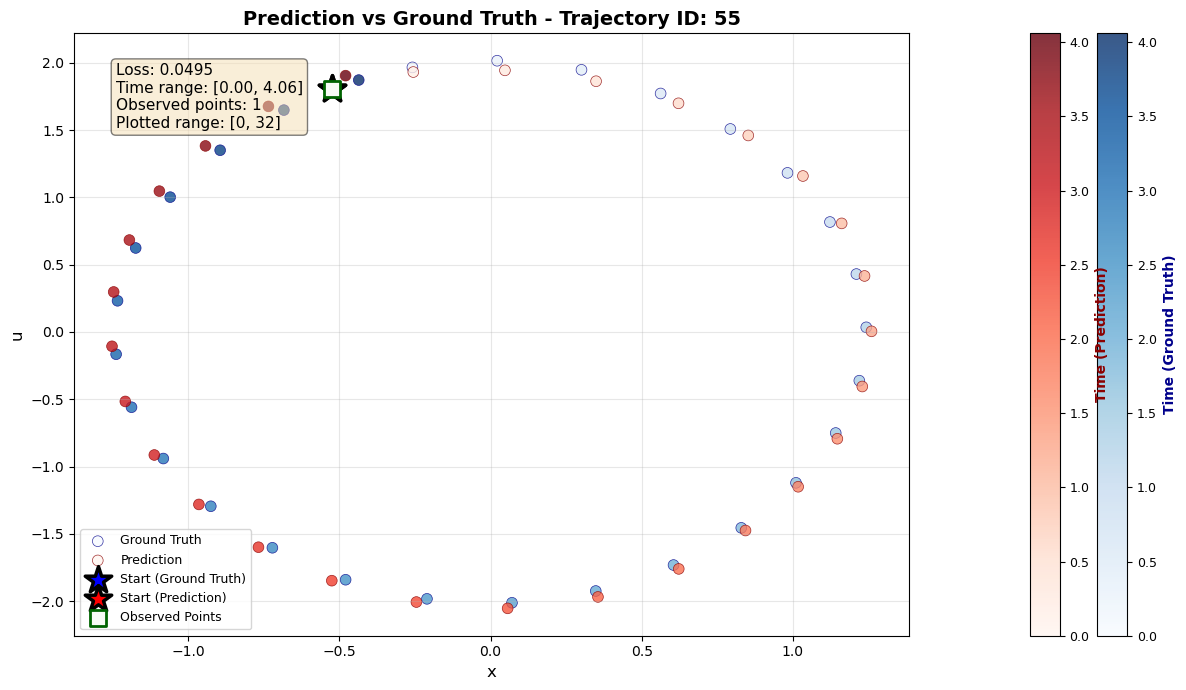

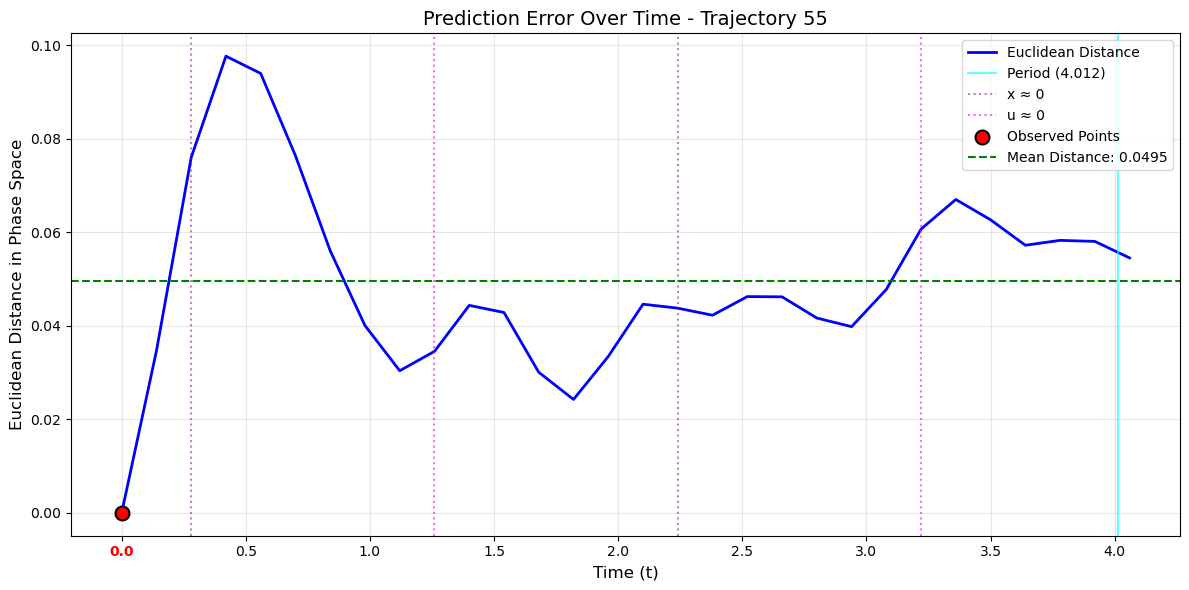

In [ ]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples_pendulum, test_df=test_df_low_samples_pendulum, trajectory_id=trajectory_id_to_show_test, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=period_test, max_t_training=max_t_training)

    trajectory_id  energy  prediction_loss  loss_per_sqrt_energy
0               0    1.30         0.699268              0.613299
1               1    1.35         0.569702              0.490322
2               2    1.40         0.697417              0.589425
3               3    1.45         0.523566              0.434798
4               4    1.50         0.636952              0.520069
5               5    1.55         0.597780              0.480149
6               6    1.60         0.521178              0.412028
7               7    1.65         0.221876              0.172730
8               8    1.70         0.243544              0.186790
9               9    1.75         0.354168              0.267726
10             10    1.80         0.404013              0.301134
11             11    1.85         0.322386              0.237023
12             12    1.90         0.274178              0.198909
13             13    1.95         0.329458              0.235930
14             14    2.00

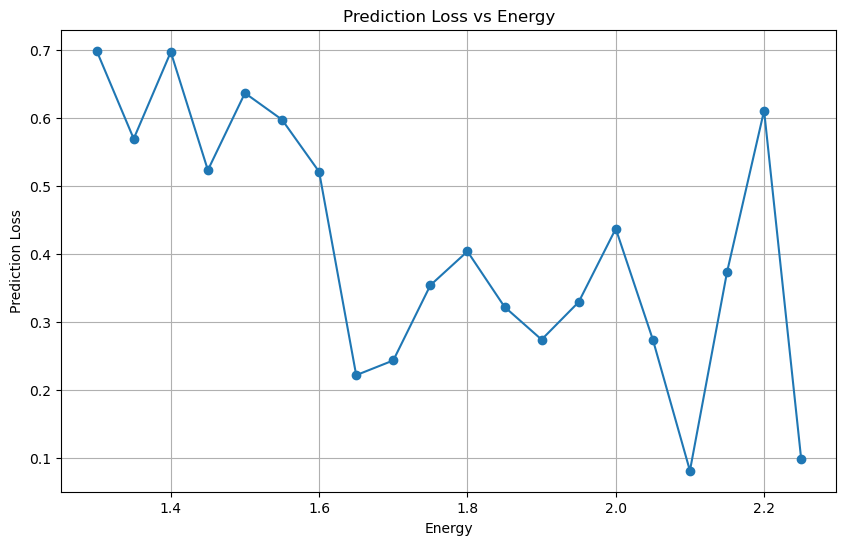

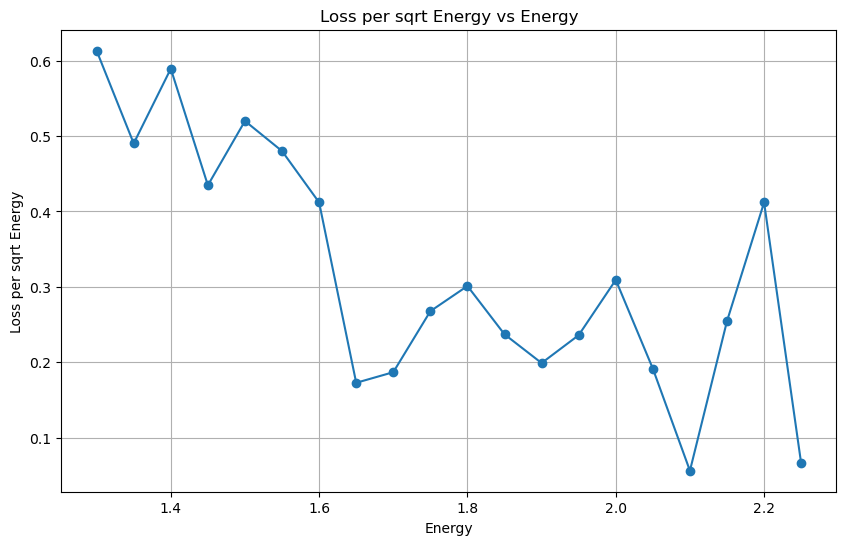

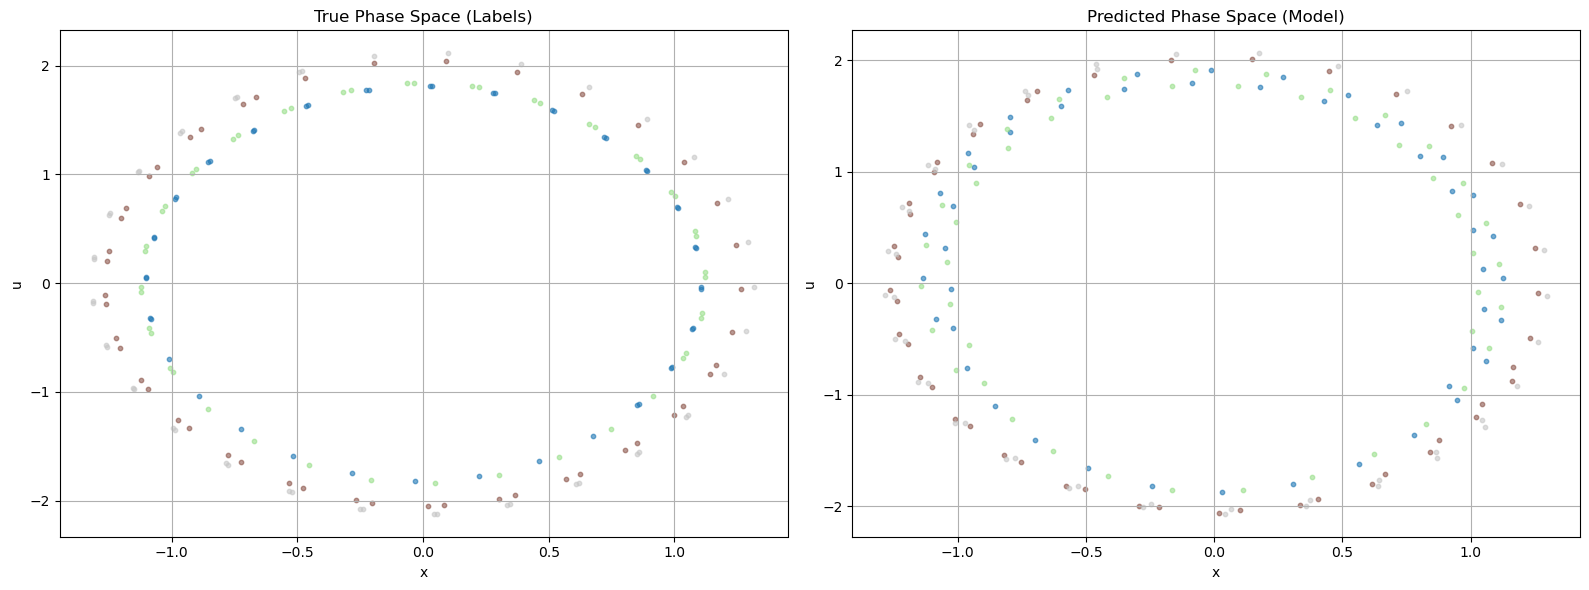

In [11]:
prediction_test_df_multiple_periods, mean_prediction_loss_test_multiple_periods, pred_test_df_multiple_periods = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples_multiple_periods_pendulum, test_df=test_df_low_samples_multiple_periods_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, recreate_and_plot_phase_space=True, plot_specific_portion=0.3333, connect_points=False, plot_trajectories_subsample=0.2, max_t_training=max_t_training)

In [14]:
trajectory_id_test_multiple_periods = 16
period_test_multiple_periods = test_id_df_low_samples_multiple_periods_pendulum[test_id_df_low_samples_multiple_periods_pendulum['trajectory_id']==trajectory_id_test_multiple_periods]['period'].values[0] if test_id_df_low_samples_multiple_periods_pendulum[test_id_df_low_samples_multiple_periods_pendulum['trajectory_id']==trajectory_id_test_multiple_periods]['motion_type'].values[0] == "oscillating" else 0.0

In [17]:
test_id_df_low_samples_multiple_periods_pendulum

trajectory_id        x0        u0  energy      phi0  motion_type  \
0               0  0.735846 -1.023514    1.30  2.430464  oscillating   
1               1  0.027948  1.642455    1.35  0.029464  oscillating   
2               2  0.699883 -1.178772    1.40 -4.160678  oscillating   
3               3 -0.741249 -1.151414    1.45  4.212106  oscillating   
4               4  0.119710 -1.719610    1.50  3.251503  oscillating   
5               5  0.202740 -1.725431    1.55 -3.581372  oscillating   
6               6 -0.360807  1.677401    1.60 -0.356824  oscillating   
7               7 -1.085155 -0.317256    1.65 -1.905319  oscillating   
8               8 -1.006473 -0.780428    1.70 -2.214445  oscillating   
9               9 -0.821421 -1.259797    1.75 -2.559688  oscillating   
10             10 -0.218366  1.859440    1.80 -0.200681  oscillating   
11             11 -0.104918  1.914943    1.85 -0.094615  oscillating   
12             12  0.892011  1.251833    1.90  0.906644  oscillating   
13             13 -0.288517  1.911021    1.95 -0.255816  oscillating   
14             14  0.431147 -1.857666    2.00  3.085274  oscillating   
15             15 -0.404727  1.901383    2.05 -0.353457  oscillating   
16             16  1.165386 -0.752579    2.10  2.205174  oscillating   
17             17  0.709749 -1.688536    2.15  2.866132  oscillating   
18             18  0.669846  1.761676    2.20  0.585178  oscillating   
19             19  1.045426 -1.228495    2.25  2.516511  oscillating   

      period  generated_points  start_index  end_index  
0   3.852371               144            0        144  
1   3.862363               144          144        288  
2   3.872476               144          288        432  
3   3.882712               144          432        576  
4   3.893074               144          576        720  
5   3.903564               144          720        864  
6   3.914187               144          864       1008  
7   3.924944               144         1008       1152  
8   3.935839               144         1152       1296  
9   3.946876               144         1296       1440  
10  3.958058               144         1440       1584  
11  3.969389               144         1584       1728  
12  3.980871               144         1728       1872  
13  3.992510               144         1872       2016  
14  4.004310               144         2016       2160  
15  4.016273               144         2160       2304  
16  4.028405               144         2304       2448  
17  4.040710               144         2448       2592  
18  4.053194               144         2592       2736  
19  4.065860               144         2736       2880

Observed time points: [0.]


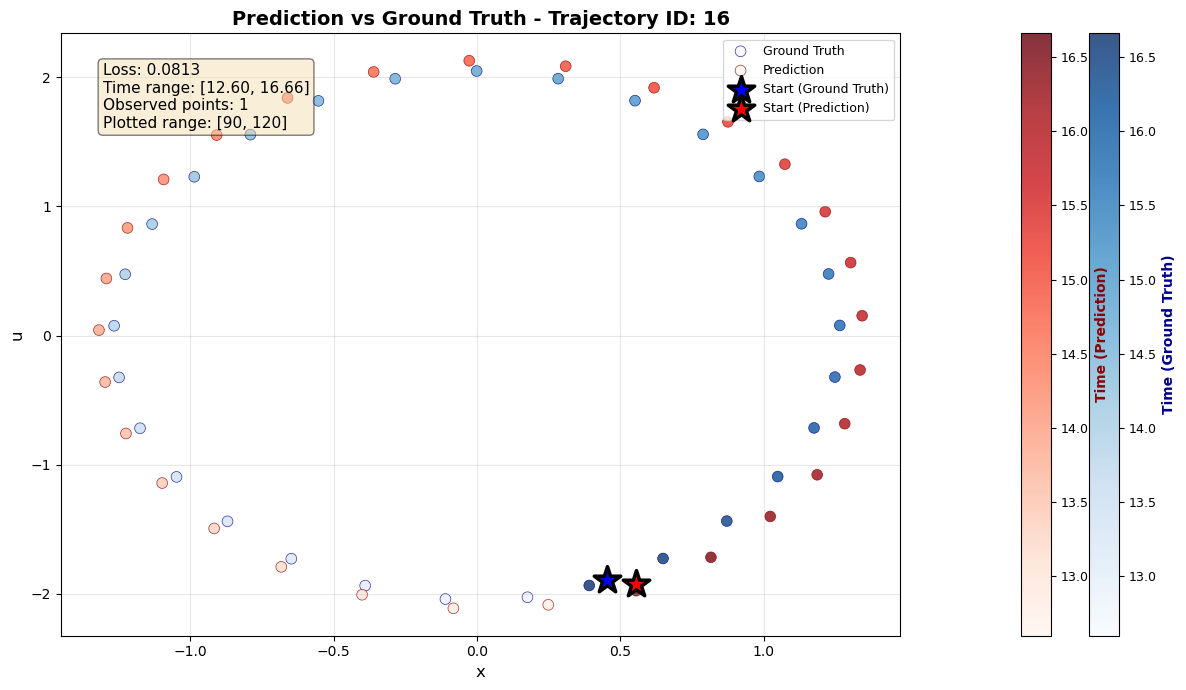

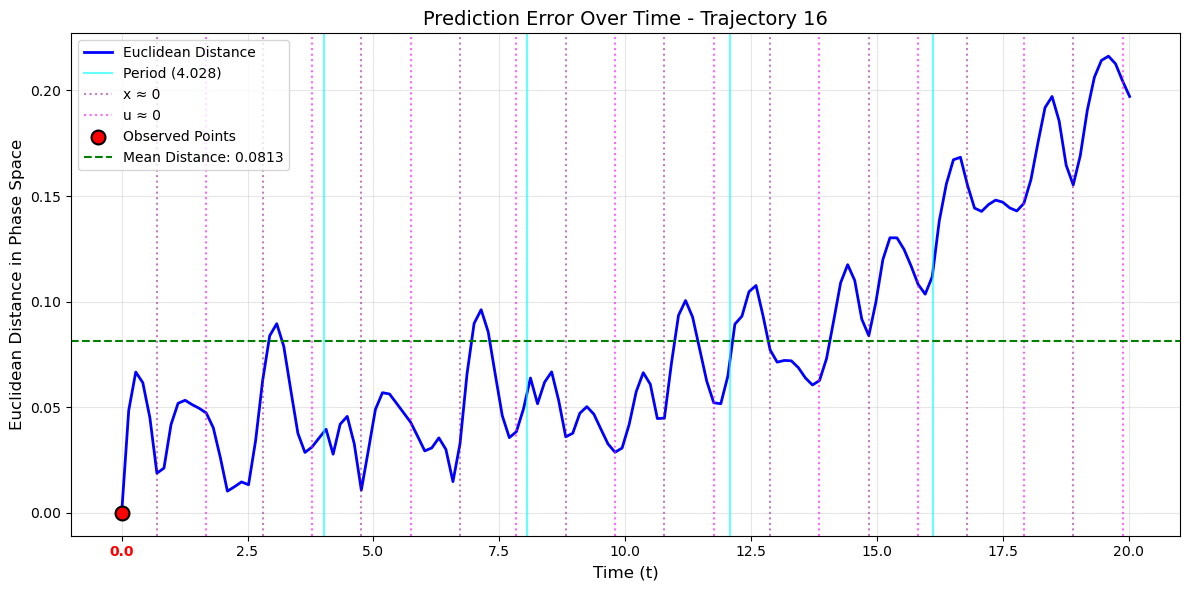

In [18]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_low_samples_multiple_periods_pendulum, test_df=test_df_low_samples_multiple_periods_pendulum, trajectory_id=trajectory_id_test_multiple_periods, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[3*30,4*30], show_zeroings=True, show_period=True, period=period_test_multiple_periods, max_t_training=max_t_training)

In [237]:
print(f"The max energy of a trajectory in the training set is: {train_id_df_low_samples_pendulum['energy'].max():.3f}\nThe high energy testing set has energies in the range: {test_id_df_high_energy_low_samples_pendulum['energy'].min():.3f}-{test_id_df_high_energy_low_samples_pendulum['energy'].max():.3f}")

The max energy of a trajectory in the training set is: 2.287
The high energy testing set has energies in the range: 2.400-4.431


In [238]:
point_indexes_observed_high_energy = [0]


    trajectory_id    energy  prediction_loss  loss_per_sqrt_energy
0               0  2.400000         0.182757              0.117969
5               5  2.823077         0.241178              0.143541
6               6  2.907692         0.335755              0.196901
8               8  3.076923         0.306116              0.174513
10             10  3.246154         0.502261              0.278769
11             11  3.330769         0.389822              0.213596
13             13  3.500000         0.344613              0.184203
14             14  3.584615         0.375588              0.198376
17             17  3.838462         0.500630              0.255528
19             19  4.007692         0.573376              0.286412
20             20  4.092308         0.564003              0.278803
21             21  4.176923         0.615951              0.301383
24             24  4.430769         0.719195              0.341670
Mean prediction loss over full dataframe: 0.4347


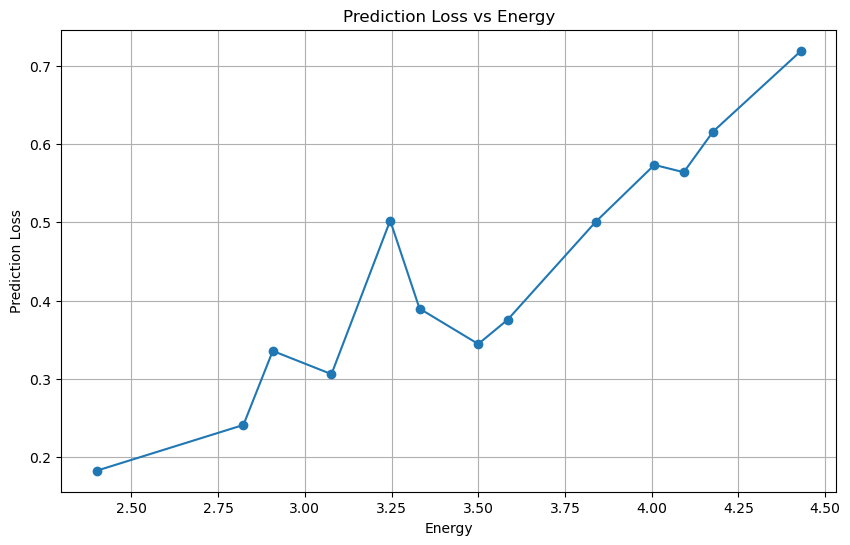

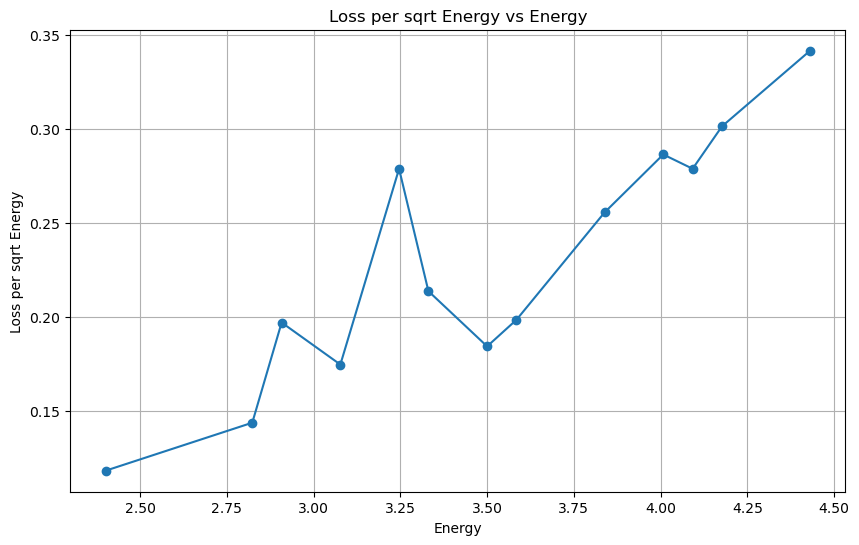

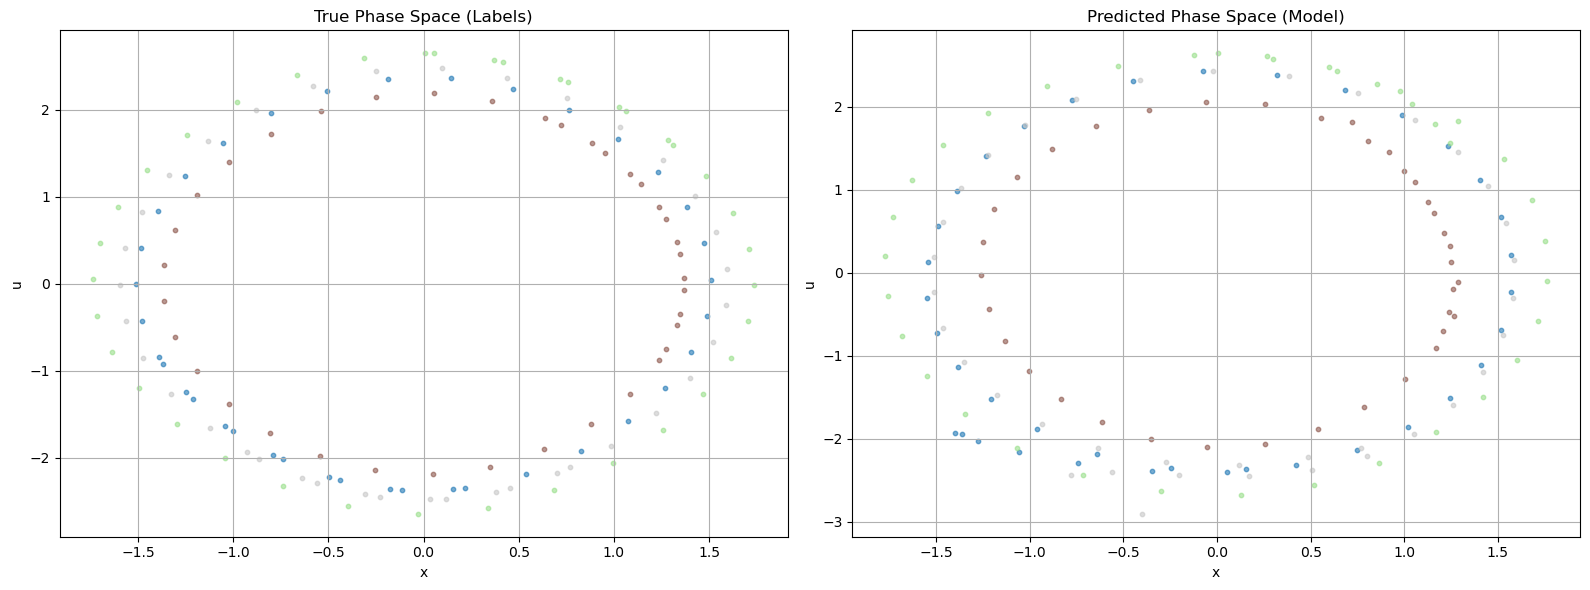

In [ ]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy, pred_test_high_energy_df = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_low_samples_pendulum, test_df=test_df_high_energy_low_samples_pendulum, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, recreate_and_plot_phase_space=True, plot_specific_portion=1.0, connect_points=False, plot_trajectories_subsample=0.3, max_t_training=max_t_training)

    trajectory_id    energy  variance_loss  variance_per_sqrt_energy
0               0  2.400000            0.0                       0.0
5               5  2.823077            0.0                       0.0
6               6  2.907692            0.0                       0.0
8               8  3.076923            0.0                       0.0
10             10  3.246154            0.0                       0.0
11             11  3.330769            0.0                       0.0
13             13  3.500000            0.0                       0.0
14             14  3.584615            0.0                       0.0
17             17  3.838462            0.0                       0.0
19             19  4.007692            0.0                       0.0
20             20  4.092308            0.0                       0.0
21             21  4.176923            0.0                       0.0
24             24  4.430769            0.0                       0.0
Mean prediction loss over full dat

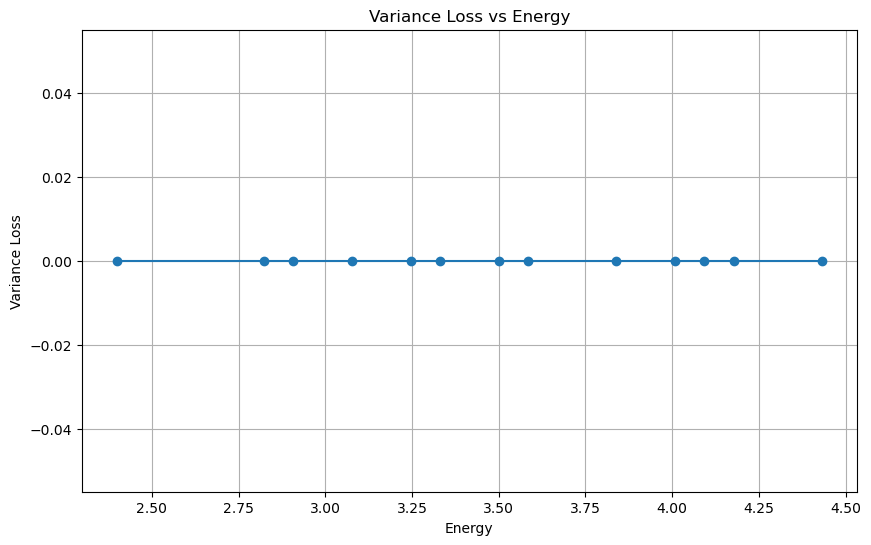

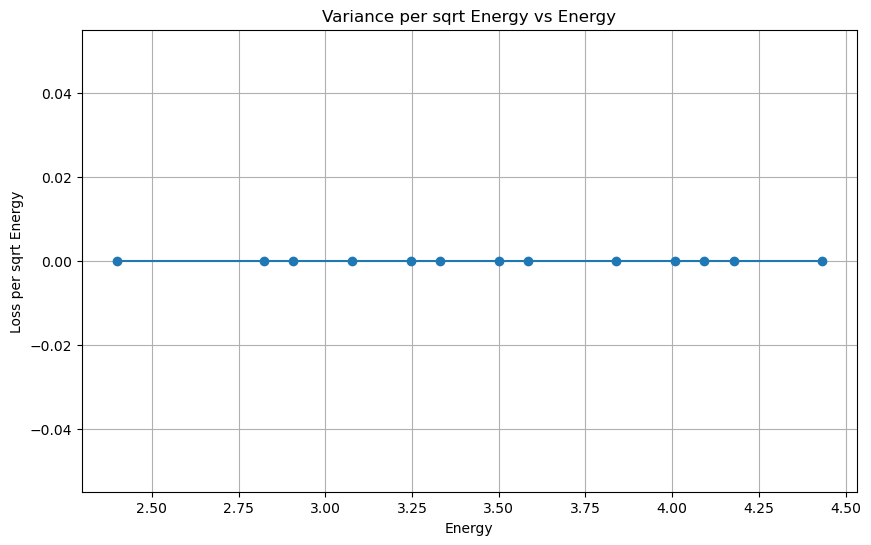

In [87]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_low_samples_pendulum, test_df=test_df_high_energy_low_samples_pendulum, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed_high_energy)


In [241]:
trajectory_id_to_show_test_high_energy=14
period_test_high_energy = test_id_df_high_energy_low_samples_pendulum[test_id_df_high_energy_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test_high_energy]['period'].values[0] if test_id_df_high_energy_low_samples_pendulum[test_id_df_high_energy_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test_high_energy]['motion_type'].values[0] == "oscillating" else 0.0

Observed time points: [0.]


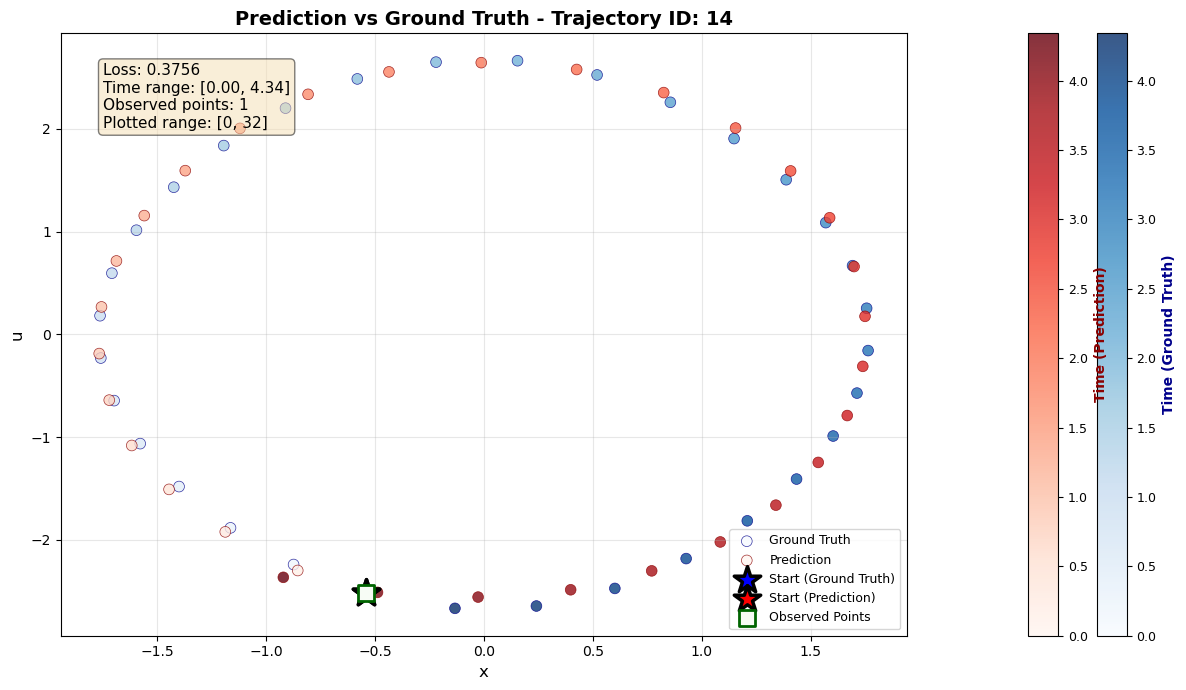

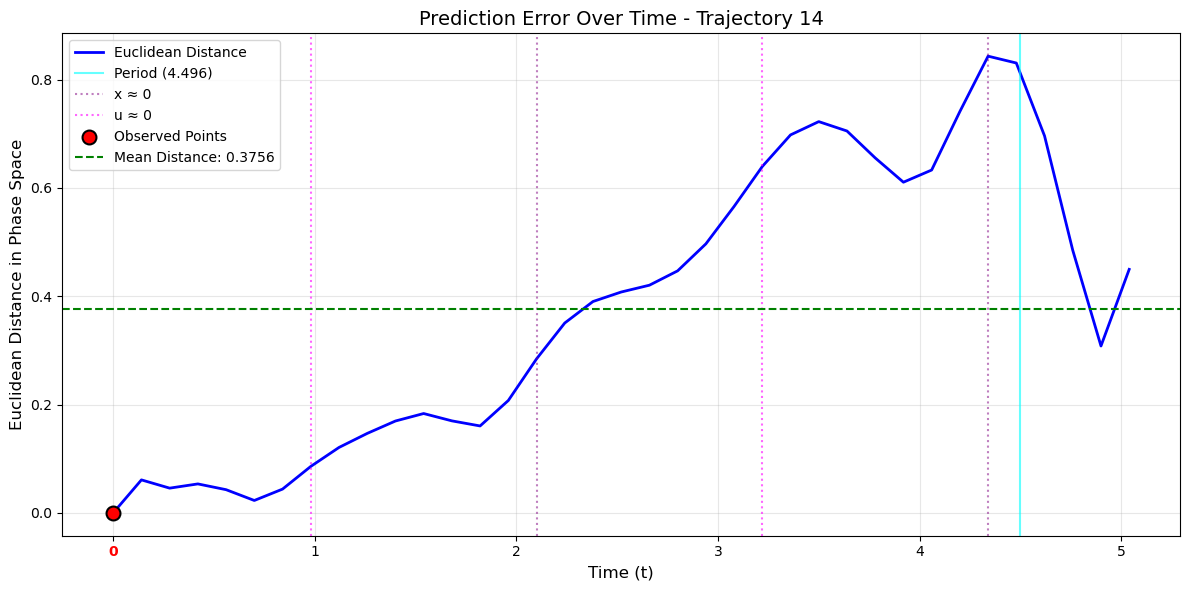

In [ ]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_low_samples_pendulum, test_df=test_df_high_energy_low_samples_pendulum, trajectory_id=trajectory_id_to_show_test_high_energy, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed_high_energy, connect_points=False, portion_to_visualize=[0,32], show_zeroings=True, show_period=True, period=test_id_df_high_energy_low_samples_pendulum[test_id_df_high_energy_low_samples_pendulum['trajectory_id']==trajectory_id_to_show_test_high_energy]['period'].values[0], max_t_training=max_t_training)

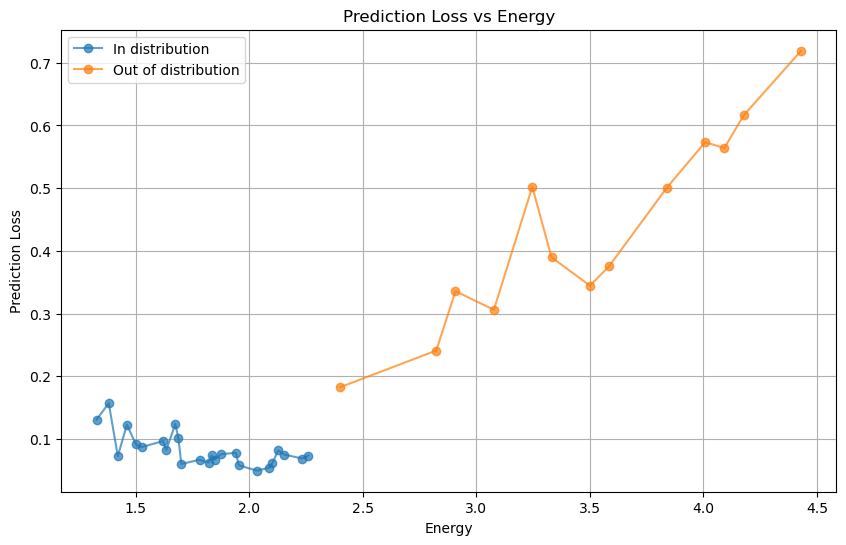

In [240]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

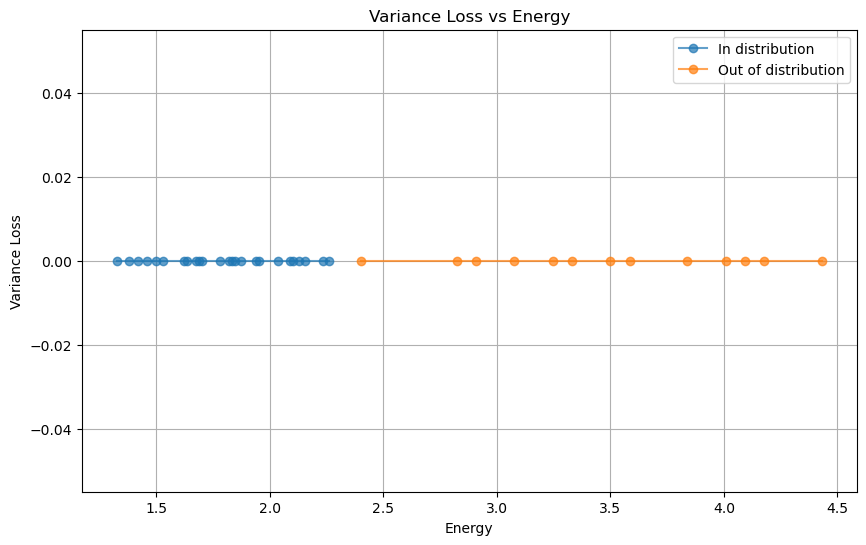

In [91]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

Step 1 gamma values mean: 0.641±0.170

Step 2 gamma values mean: 0.658±0.178



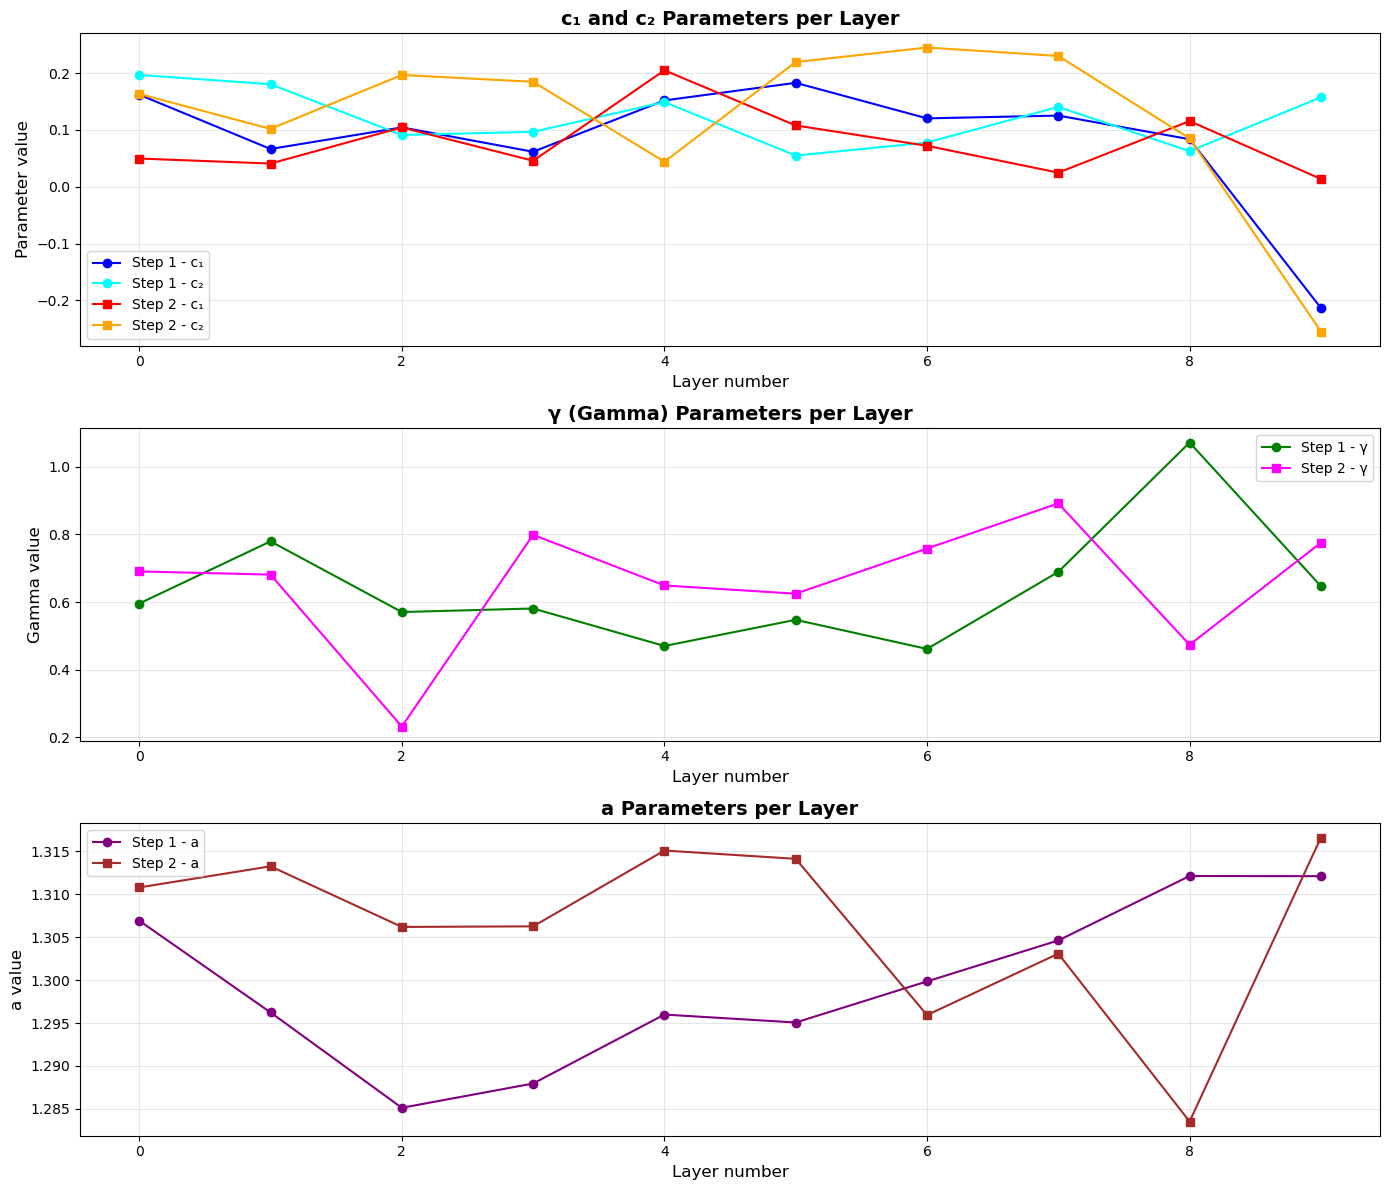

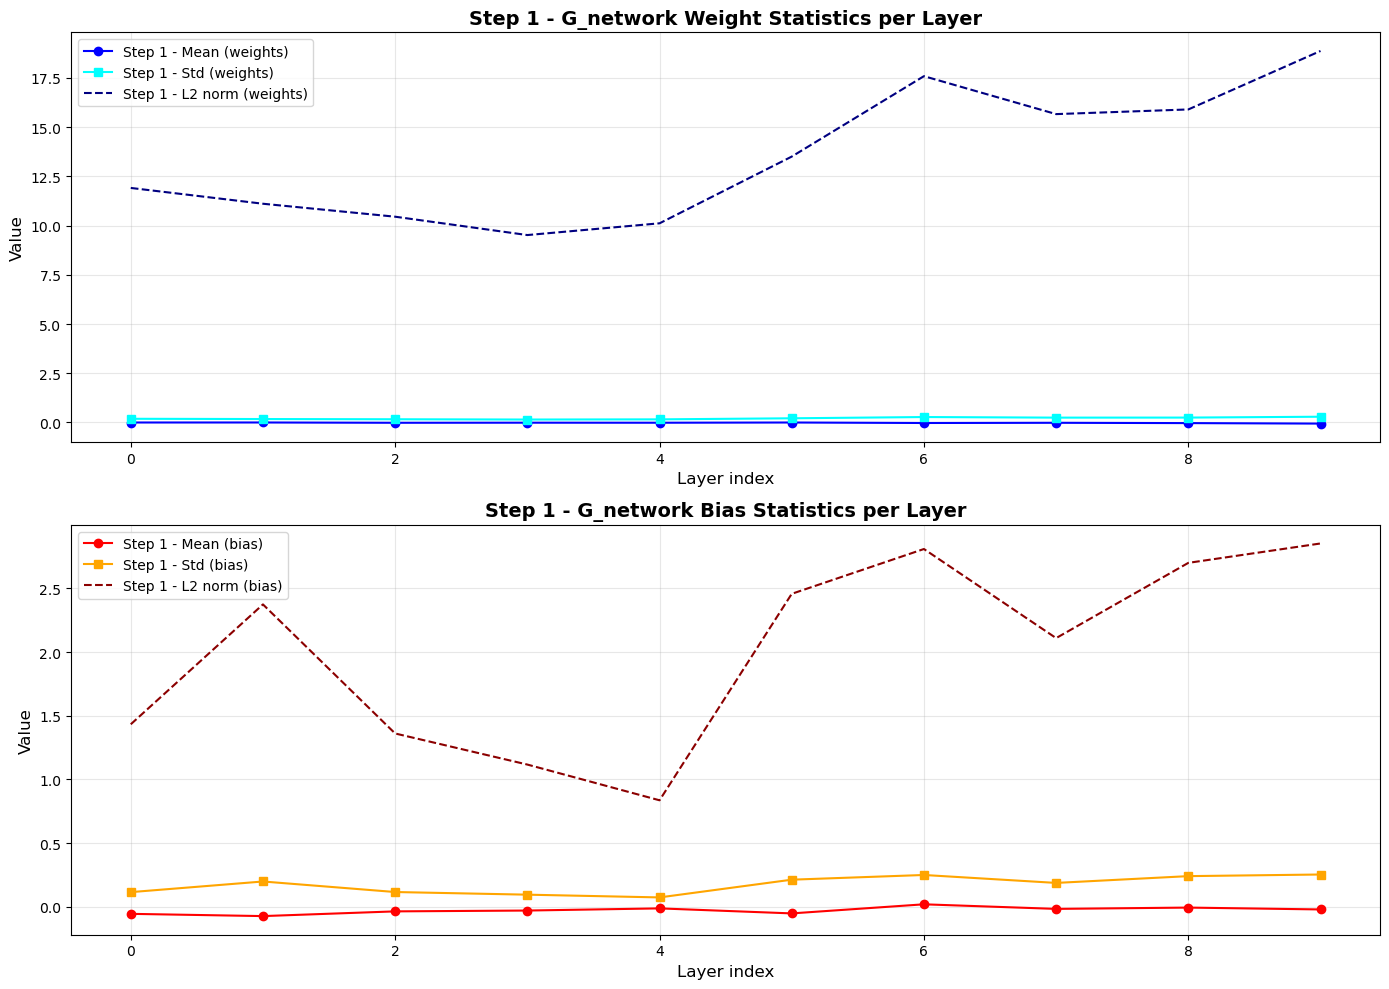

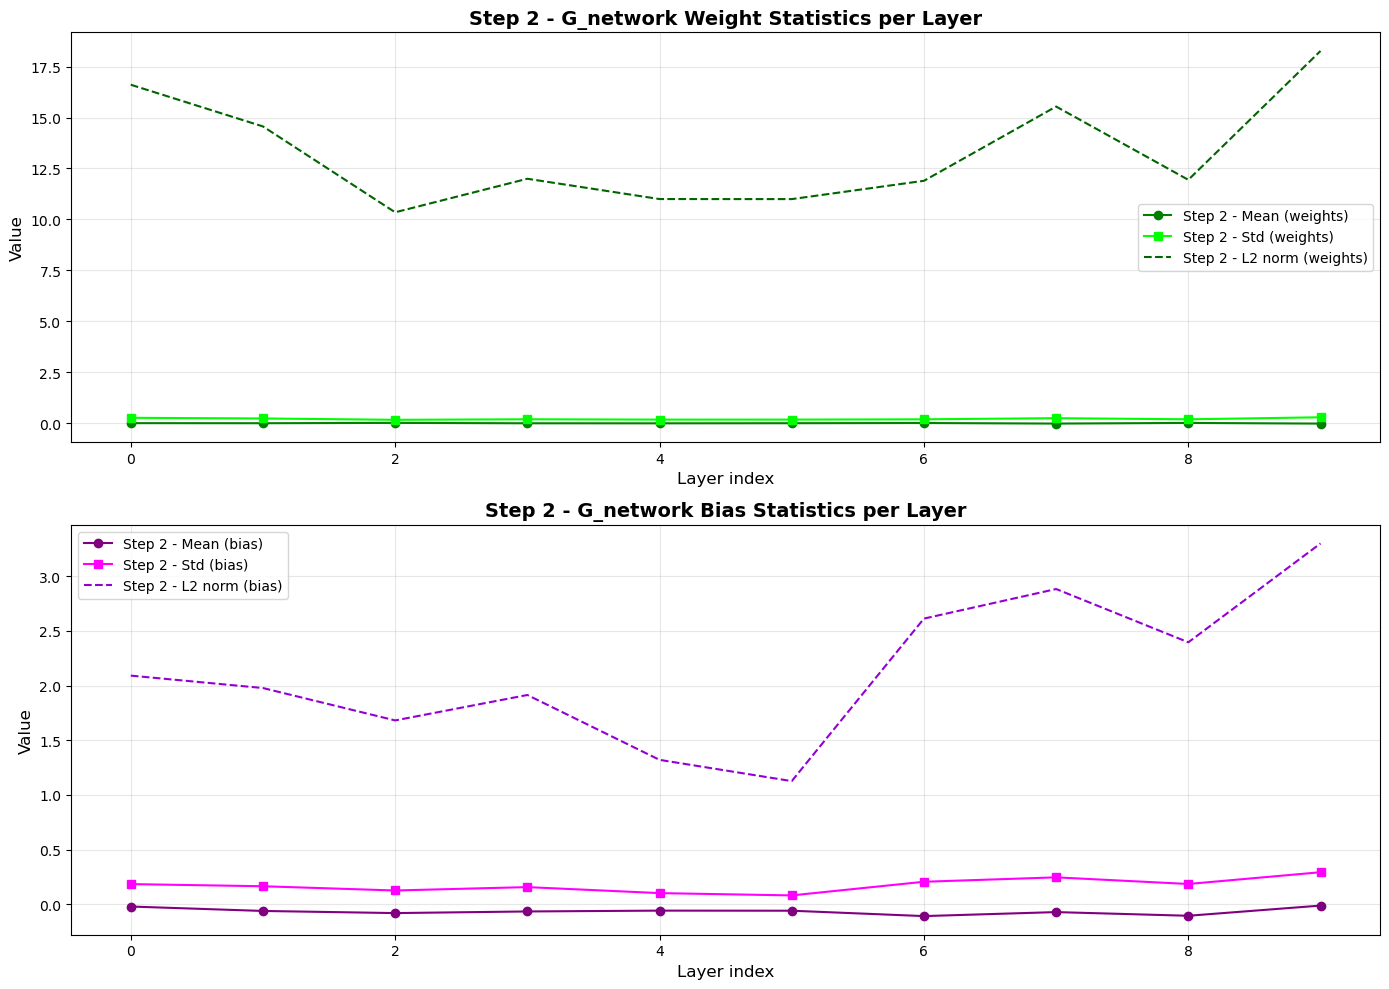

In [92]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)
